# Analiza danych o uzyciu rowerów / miejskich skuterów elektrycznych

## Import needed libraries

In [ ]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/pliki/

/content/drive/My Drive/pliki


## Load datasets

Dataset #1: https://data.world/cityofchicago/2kfw-zvte
<br> Chicago scooter 2019

In [ ]:
df_chicago_2019 = pd.read_csv('e-scooter-trips-2019-pilot-1.csv')
df_chicago_2019['Vehicle Type'] = 'scooter'
df_chicago_2019

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Accuracy,Start Census Tract,End Census Tract,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location,Vehicle Type
0,2b66b89f-9cd2-4f4f-a41b-5827bed5a9bb,09/17/2019 02:00:00 PM,09/17/2019 02:00:00 PM,0,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scooter
1,2254578e-5ba6-41a6-9220-6c9f70e301b1,06/28/2019 09:00:00 PM,06/28/2019 10:00:00 PM,3000,945,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scooter
2,59284b84-71e5-451c-ac72-1316bdada872,07/13/2019 09:00:00 AM,07/13/2019 09:00:00 AM,2000,740,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scooter
3,701f3d5e-d18d-40b3-86aa-bb221fec66cf,08/29/2019 02:00:00 PM,08/29/2019 02:00:00 PM,0,447,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scooter
4,7c423a03-3351-5425-b2f9-c6b227edbe69,06/21/2019 08:00:00 PM,06/21/2019 08:00:00 PM,2882,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,scooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710834,536f855f-2530-4c07-b93e-4de52e75cf1b,09/06/2019 07:00:00 AM,09/06/2019 07:00:00 AM,2524,500,10,NaN,NaN,19.0,19.0,BELMONT CRAGIN,BELMONT CRAGIN,41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),scooter
710835,88721836-1a6c-4ae6-b320-8e9ce1861d16,07/11/2019 11:00:00 AM,07/11/2019 11:00:00 AM,2475,480,10,NaN,NaN,20.0,19.0,HERMOSA,BELMONT CRAGIN,41.924348,-87.734740,POINT (-87.7347401601846 41.9243477570064),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),scooter
710836,3f930717-06cf-499d-b390-a45282851347,09/17/2019 05:00:00 PM,09/17/2019 05:00:00 PM,2228,590,10,NaN,NaN,19.0,19.0,BELMONT CRAGIN,BELMONT CRAGIN,41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),scooter
710837,11d01331-0a12-607e-11d0-13310a12607e,06/21/2019 05:00:00 PM,06/21/2019 05:00:00 PM,1303,1088,10,NaN,NaN,19.0,19.0,BELMONT CRAGIN,BELMONT CRAGIN,41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),41.927261,-87.765502,POINT (-87.7655018368979 41.9272607415187),scooter


Dataset #2: https://divvybikes.com/system-data
<br >Chicago bicycle 2019

In [ ]:
df_chicago_2019_1 = pd.read_csv('Divvy_Trips_2019_Q1.csv')
df_chicago_2019_2 = pd.read_csv('Divvy_Trips_2019_Q2.csv')
df_chicago_2019_3 = pd.read_csv('Divvy_Trips_2019_Q3.csv')
df_chicago_2019_4 = pd.read_csv('Divvy_Trips_2019_Q4.csv')

df_chicago_2019_bic = pd.concat([df_chicago_2019_1, df_chicago_2019_2, df_chicago_2019_3, df_chicago_2019_4])
df_chicago_2019_bic['Vehicle Type'] = 'electric bike'
df_chicago_2019_bic

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year,Vehicle Type
0,21742443.0,2019-01-01 00:04:37,2019-01-01 00:11:07,2167.0,390.0,199.0,Wabash Ave & Grand Ave,84.0,Milwaukee Ave & Grand Ave,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric bike
1,21742444.0,2019-01-01 00:08:13,2019-01-01 00:15:34,4386.0,441.0,44.0,State St & Randolph St,624.0,Dearborn St & Van Buren St (*),Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric bike
2,21742445.0,2019-01-01 00:13:23,2019-01-01 00:27:12,1524.0,829.0,15.0,Racine Ave & 18th St,644.0,Western Ave & Fillmore St (*),Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric bike
3,21742446.0,2019-01-01 00:13:45,2019-01-01 00:43:28,252.0,"1,783.0",123.0,California Ave & Milwaukee Ave,176.0,Clark St & Elm St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric bike
4,21742447.0,2019-01-01 00:14:52,2019-01-01 00:20:56,1170.0,364.0,173.0,Mies van der Rohe Way & Chicago Ave,35.0,Streeter Dr & Grand Ave,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704049,25962900.0,2019-12-31 23:56:13,2020-01-01 00:15:45,2196.0,"1,172.0",112.0,Green St & Randolph St,225.0,Halsted St & Dickens Ave,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric bike
704050,25962901.0,2019-12-31 23:56:34,2020-01-01 00:22:08,4877.0,"1,533.0",90.0,Millennium Park,90.0,Millennium Park,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric bike
704051,25962902.0,2019-12-31 23:57:05,2020-01-01 00:05:46,863.0,520.0,623.0,Michigan Ave & 8th St,52.0,Michigan Ave & Lake St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric bike
704052,25962903.0,2019-12-31 23:57:11,2020-01-01 00:05:45,2637.0,514.0,623.0,Michigan Ave & 8th St,52.0,Michigan Ave & Lake St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,electric bike


Dataset #3 : https://www.kaggle.com/datasets/razamh/escooters-trips

Chicago scooter 2020

In [ ]:
df_chicago_2020 = pd.read_csv('E-Scooter_Trips_-_2020.csv')
df_chicago_2020['Vehicle Type']='scooter'

df_chicago_2020

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Vendor,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location,Vehicle Type
0,3eb9a2a3-3266-4559-b1ec-e83a6f7972ab,08/12/2020 05:00:00 AM,08/12/2020 05:00:00 AM,"1,153","1,027",spin,68.0,68.0,ENGLEWOOD,ENGLEWOOD,41.780068,-87.642266,POINT (-87.64226608 41.78006847),41.780068,-87.642266,POINT (-87.64226608 41.78006847),scooter
1,82dd7b8f-8de0-4f25-829b-b32bf47e8419,08/12/2020 05:00:00 AM,08/12/2020 05:00:00 AM,17,91,spin,22.0,21.0,LOGAN SQUARE,AVONDALE,41.922903,-87.704301,POINT (-87.70430082 41.92290349),41.939283,-87.710757,POINT (-87.71075685 41.93928256),scooter
2,9120cbf3-f749-49b6-b894-0e6e065cd731,08/12/2020 05:00:00 AM,08/12/2020 05:00:00 AM,"2,883",724,spin,3.0,6.0,UPTOWN,LAKE VIEW,41.965435,-87.655145,POINT (-87.65514456 41.96543532),41.943514,-87.657498,POINT (-87.65749768 41.9435138),scooter
3,cf2e4abc-2649-49be-924b-468a1aefc4c8,08/12/2020 05:00:00 AM,08/12/2020 05:00:00 AM,5,21,spin,31.0,31.0,LOWER WEST SIDE,LOWER WEST SIDE,41.848335,-87.675179,POINT (-87.67517932 41.84833501),41.848335,-87.675179,POINT (-87.67517932 41.84833501),scooter
4,0448afb5-ab64-4090-b528-e3050e7eb0f2,08/12/2020 07:00:00 AM,08/12/2020 07:00:00 AM,"1,179",245,spin,6.0,6.0,LAKE VIEW,LAKE VIEW,41.943514,-87.657498,POINT (-87.65749768 41.9435138),41.943514,-87.657498,POINT (-87.65749768 41.9435138),scooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630811,2c648499-436a-4244-bf2b-ce0041ee4129,12/12/2020 09:00:00 PM,12/12/2020 10:00:00 PM,"4,226","1,327",lime,11.0,11.0,JEFFERSON PARK,JEFFERSON PARK,41.978727,-87.768147,POINT (-87.76814656 41.97872681),41.978727,-87.768147,POINT (-87.76814656 41.97872681),scooter
630812,72119cd3-18db-4a08-8da7-1639a6894a18,12/12/2020 09:00:00 PM,12/12/2020 09:00:00 PM,"1,822",211,spin,3.0,3.0,UPTOWN,UPTOWN,41.965435,-87.655145,POINT (-87.65514456 41.96543532),41.965435,-87.655145,POINT (-87.65514456 41.96543532),scooter
630813,1e01298b-75e3-4a22-b440-388b093f7202,12/12/2020 09:00:00 PM,12/12/2020 10:00:00 PM,878,325,lime,28.0,24.0,NEAR WEST SIDE,WEST TOWN,41.874254,-87.664619,POINT (-87.66461906 41.87425419),41.901459,-87.675568,POINT (-87.67556756 41.90145875),scooter
630814,cce935b2-3dc8-4e06-b913-a1fd37c652d0,12/12/2020 09:00:00 PM,12/12/2020 10:00:00 PM,294,"1,332",bird,7.0,7.0,LINCOLN PARK,LINCOLN PARK,41.921880,-87.645647,POINT (-87.64564651 41.92188043),41.921880,-87.645647,POINT (-87.64564651 41.92188043),scooter


Dataset #4: https://data.world/kgarrett/austin-dockless-mobility/workspace/file?filename=clean_austin_dockless_mobility.csv
<br> Austin 2018

In [ ]:
df_austin_2018 = pd.read_csv('clean_austin_dockless_mobility.csv')
df_austin_2018

,id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,...,origin_cell_id,destination_cell_id,year,yearmonth,start_latitude,start_longitude,start_location,end_latitude,end_longitude,end_location
0,000000cb-78a9-4b95-8ead-37c797abcf37,ad14e63b-940d-4ca3-84c6-0131147fba45,scooter,358,915,2018-06-29T17:30:00,2018-06-29T17:30:00,2018-12-12T21:36:14,6,17,...,013445,013916,2018,2018-06,30.263,-97.762,POINT(-97.762 30.263),30.259,-97.754,POINT(-97.754 30.259)
1,00001b5f-46aa-4b26-a12f-d7b4d3c69834,c5a230c9-7e80-4464-862f-f2b23f61d6d3,scooter,226,839,2018-11-30T11:00:00,2018-11-30T11:00:00,2018-12-13T15:43:44,11,11,...,014556,015186,2018,2018-11,30.283,-97.745,POINT(-97.745 30.283),30.284,-97.737,POINT(-97.737 30.284)
2,00005c8d-b73e-4eb8-82ae-fe56e5fbaac7,1788b0da-1466-4062-b91d-b88c26f0bef9,scooter,346,890,2018-07-13T18:00:00,2018-07-13T18:15:00,2018-12-12T21:11:41,7,18,...,013603,014077,2018,2018-07,30.264,-97.760,POINT(-97.76 30.264),30.267,-97.754,POINT(-97.754 30.267)
3,0002a599-4cea-4ae3-946b-fe33c5f5ecc5,77c3c97b-83ad-46db-bd42-ba2546e8bbfc,scooter,299,921,2018-11-01T12:30:00,2018-11-01T12:30:00,2018-12-13T15:52:32,11,12,...,014718,015030,2018,2018-11,30.293,-97.744,POINT(-97.744 30.293),30.287,-97.739,POINT(-97.739 30.287)
4,001f687d-6cf5-442e-8a4c-cbd20dcc72ae,1286667a-f578-476d-9960-7724a543c0cd,scooter,257,414,2018-09-02T14:15:00,2018-09-02T14:15:00,2018-12-13T15:43:25,9,14,...,014864,014707,2018,2018-09,30.266,-97.740,POINT(-97.74 30.266),30.268,-97.742,POINT(-97.742 30.268)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969570,7e7b695b-5912-4772-b5c1-1a067f602f93,b9cde9c8-5df7-4033-aaab-6f7637986ace,scooter,222,462,2018-07-30T09:45:00,2018-07-30T09:45:00,2018-12-13T15:55:48,7,9,...,014706,014863,2018,2018-07,30.265,-97.742,POINT(-97.742 30.265),30.263,-97.740,POINT(-97.74 30.263)
1969571,7e7b7c3f-99e6-4e72-86a8-a778d7ed4ae1,02044efe-5061-45d3-93fc-1586cd377016,scooter,256,1239,2018-08-08T12:45:00,2018-08-08T12:45:00,2018-12-13T15:50:55,8,12,...,016301,015831,2018,2018-08,30.314,-97.719,POINT(-97.719 30.314),30.320,-97.727,POINT(-97.727 30.32)
1969572,7e7b8409-158d-4806-8a6b-1180322c6ea2,30339131-30c3-429b-bdeb-11166e6c1ceb,scooter,153,467,2018-11-17T01:45:00,2018-11-17T01:45:00,2018-12-13T15:51:01,11,1,...,014556,014870,2018,2018-11,30.282,-97.747,POINT(-97.747 30.282),30.281,-97.741,POINT(-97.741 30.281)
1969573,7e7ba140-1886-4700-8ddf-c8709f226025,5fa006a7-1772-4fdd-8464-bc3d06c89bd2,scooter,1091,3847,2018-09-08T00:30:00,2018-09-08T00:45:00,2018-12-13T15:44:48,9,0,...,016919,014871,2018,2018-09,30.285,-97.710,POINT(-97.71 30.285),30.283,-97.740,POINT(-97.74 30.283)


Dataset #5: https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/
<br>Toronto bicycle 2019

In [ ]:
df_toronto_2019_1 = pd.read_csv('2019-Q1.csv')
df_toronto_2019_2 = pd.read_csv('2019-Q2.csv')
df_toronto_2019_3 = pd.read_csv('2019-Q3.csv')
df_toronto_2019_4 = pd.read_csv('2019-Q4.csv')

df_toronto_2019 = pd.concat([df_toronto_2019_1, df_toronto_2019_2, df_toronto_2019_3, df_toronto_2019_4])
df_toronto_2019['Vehicle Type'] = 'electric bike'
df_toronto_2019

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Vehicle Type
0,4581278,1547.0,7021,01/01/2019 00:08,Bay St / Albert St,7233.0,01/01/2019 00:33,King / Cowan Ave - SMART,1296,Annual Member,electric bike
1,4581279,1112.0,7160,01/01/2019 00:10,King St W / Tecumseth St,7051.0,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),2947,Annual Member,electric bike
2,4581280,589.0,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013.0,01/01/2019 00:25,Scott St / The Esplanade,2293,Annual Member,electric bike
3,4581281,259.0,7012,01/01/2019 00:16,Elizabeth St / Edward St (Bus Terminal),7235.0,01/01/2019 00:20,Bay St / College St (West Side) - SMART,283,Annual Member,electric bike
4,4581282,281.0,7041,01/01/2019 00:19,Edward St / Yonge St,7257.0,01/01/2019 00:24,Dundas St W / St. Patrick St,1799,Annual Member,electric bike
...,...,...,...,...,...,...,...,...,...,...,...
468411,7334123,523.0,7098,12/31/2019 23:39,Riverdale Park South (Broadview Ave),7339.0,12/31/2019 23:48,Carlaw Ave / Strathcona Ave,861,Annual Member,electric bike
468412,7334124,273.0,7044,12/31/2019 23:45,Church St / Alexander St,7273.0,12/31/2019 23:49,Bay St / Charles St - SMART,3776,Annual Member,electric bike
468413,7334125,1055.0,7100,12/31/2019 23:51,Dundas St E / Regent Park Blvd,7100.0,01/01/2020 00:08,Dundas St E / Regent Park Blvd,2382,Annual Member,electric bike
468414,7334126,459.0,7470,12/31/2019 23:55,York St / Lake Shore Blvd W,7102.0,01/01/2020 00:03,Nelson St / Duncan St,2800,Annual Member,electric bike


Dataset #6: https://bikeshare.metro.net/about/data/

Los Angeles bicycle 2020

In [ ]:
df_los_angeles_2020_1 = pd.read_csv('metro-bike-share-trips-2020-q1.csv')
df_los_angeles_2020_2 = pd.read_csv('metro-trips-2020-q2-v2.csv')
df_los_angeles_2020_3 = pd.read_csv('metro-trips-2020-q3.csv')
df_los_angeles_2020_4 = pd.read_csv('metro-trips-2020-q4.csv')

df_los_angeles_2020 = pd.concat([df_los_angeles_2020_1, df_los_angeles_2020_2, df_los_angeles_2020_3, df_los_angeles_2020_4])

# stations name by id
header = ["start_station", "Start Location Name","Go live date","Region","Status"]

df_los_angeles_stations = pd.read_csv('metro-bike-share-stations-2023-01-01.csv', encoding='cp1252', names=header)

df_los_angeles_2020 =  df_los_angeles_2020.merge(df_los_angeles_stations, on='start_station', how='left')

header = {"start_station" : "end_station", "Start Location Name" : "End Location Name"}
df_los_angeles_stations.rename(columns = header, inplace = True)
df_los_angeles_2020 = df_los_angeles_2020.merge(df_los_angeles_stations, on='end_station', how='left')
df_los_angeles_2020 = df_los_angeles_2020.drop(columns = ["start_station", "end_station"])
df_los_angeles_2020

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,...,passholder_type,bike_type,Start Location Name,Go live date_x,Region_x,Status_x,End Location Name,Go live date_y,Region_y,Status_y
0,134867493,25,1/1/2020 0:16,1/1/2020 0:41,34.048038,-118.253738,34.047440,-118.247940,18419,30,...,Monthly Pass,electric,Pershing Square,7/7/2016,DTLA,Active,Main & Winston,12/11/2019,DTLA,Active
1,134867799,35,1/1/2020 0:24,1/1/2020 0:59,NaN,NaN,34.017681,-118.409081,15661,1,...,One Day Pass,smart,Metro Bike Share Free Bikes,12/2/2018,Free Bikes,Active,Venice & Glendon,2/27/2019,Westside,Inactive
2,134868104,37,1/1/2020 0:31,1/1/2020 1:08,34.014309,-118.491341,34.005871,-118.429161,15848,1,...,Walk-up,smart,Downtown Santa Monica Expo Line Station,2/27/2019,Westside,Inactive,Venice & Inglewood,7/22/2020,Westside,Inactive
3,134868103,36,1/1/2020 0:32,1/1/2020 1:08,34.014309,-118.491341,34.005871,-118.429161,16053,1,...,Walk-up,smart,Downtown Santa Monica Expo Line Station,2/27/2019,Westside,Inactive,Venice & Inglewood,7/22/2020,Westside,Inactive
4,134868102,35,1/1/2020 0:33,1/1/2020 1:08,34.014309,-118.491341,34.005871,-118.429161,15694,1,...,Walk-up,smart,Downtown Santa Monica Expo Line Station,2/27/2019,Westside,Inactive,Venice & Inglewood,7/22/2020,Westside,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209969,151711987,126,12/31/2020 23:00,1/1/2021 1:06,33.984341,-118.471550,33.984341,-118.471550,6551,1,...,One Day Pass,standard,Ocean Front Walk & North Venice,7/7/2017,Westside,Active,Ocean Front Walk & North Venice,7/7/2017,Westside,Active
209970,151709683,15,12/31/2020 23:06,12/31/2020 23:21,34.051102,-118.264557,34.057968,-118.299751,6221,30,...,Monthly Pass,standard,7th & Bixel,7/7/2016,DTLA,Active,Normandie & 8th,NaN,DTLA,Active
209971,151710184,6,12/31/2020 23:42,12/31/2020 23:48,34.045849,-118.254402,34.051102,-118.264557,12305,1,...,Walk-up,standard,7th & Hill,NaN,DTLA,Active,7th & Bixel,7/7/2016,DTLA,Active
209972,151710183,6,12/31/2020 23:42,12/31/2020 23:48,34.045849,-118.254402,34.051102,-118.264557,6476,1,...,Walk-up,standard,7th & Hill,NaN,DTLA,Active,7th & Bixel,7/7/2016,DTLA,Active


Dataset #7: https://www.kaggle.com/datasets/busielmorley/city-lousiville-escooter-trip-data
<br> Lousiville Scooter 2019

In [ ]:
df_louisville_2019 = pd.read_csv('DocklessTripOpenData_9_louisville.csv')
df_louisville_2019['Vehicle Type'] = 'scooter'
df_louisville_2019['StartTime'] = df_louisville_2019['StartTime'].str.replace('^24:', '00:', regex=True)
df_louisville_2019['EndTime'] = df_louisville_2019['EndTime'].str.replace('^24:', '00:', regex=True)
df_louisville_2019['Start Time'] = df_louisville_2019['StartDate'] + " " + df_louisville_2019['StartTime']
df_louisville_2019['End Time'] = df_louisville_2019['EndDate'] + " " + df_louisville_2019['EndTime']
df_louisville_2019 = df_louisville_2019.drop(columns=['StartDate', 'StartTime', 'EndDate','EndTime'])
df_louisville_2019


,TripID,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum,Vehicle Type,Start Time,End Time
0,0000045c-2677-3a7d-4b73-cad99a57,3.0,0.000,38.253,-85.756,38.253,-85.755,4,19,scooter,2019-06-26 19:30,2019-06-26 19:30
1,0000487b-92e6-50d6-7569-42ed3818,5.0,0.000,38.207,-85.747,38.206,-85.748,1,14,scooter,2019-09-22 14:30,2019-09-22 14:30
2,00006088-2579-e0d0-6a30-a15bb878,6.0,0.330,38.264,-85.728,38.261,-85.730,4,17,scooter,2019-08-21 17:30,2019-08-21 17:30
3,00008c1a-899b-8596-970f-9f6bf495,6.0,0.640,38.217,-85.757,38.221,-85.763,4,11,scooter,2019-07-03 11:00,2019-07-03 11:15
4,000096c8-bac3-4d6f-7ebb-30b957ee,7.0,0.684,38.221,-85.762,38.223,-85.764,7,21,scooter,2019-05-04 21:15,2019-05-04 21:30
...,...,...,...,...,...,...,...,...,...,...,...,...
434577,ffff30aa-b4c7-87d4-0c09-fbb7828f,13.0,0.080,38.219,-85.763,38.220,-85.763,5,8,scooter,2019-02-14 08:30,2019-02-14 08:45
434578,ffff59ba-a29d-7f09-5d09-ce72762a,15.0,1.170,38.252,-85.758,38.258,-85.757,5,7,scooter,2019-05-02 07:15,2019-05-02 07:30
434579,ffff9a78-8f18-0ff1-cec5-c5a778a0,3.0,0.000,38.253,-85.754,38.253,-85.754,7,19,scooter,2018-09-29 19:15,2018-09-29 19:15
434580,ffffdddf-e2c9-f892-15dd-f81642fe,14.0,1.090,38.257,-85.762,38.256,-85.751,7,22,scooter,2019-07-13 22:30,2019-07-13 22:45


## Data Preprocessing
### Delete needless columns for each dataset

In [ ]:
print(df_chicago_2019.columns)
print(df_chicago_2019_bic.columns)
print(df_chicago_2020.columns)
print(df_austin_2018.columns)
print(df_toronto_2019.columns)
print(df_los_angeles_2020.columns)
print(df_louisville_2019.columns)

Index(['Trip ID', 'Start Time', 'End Time', 'Trip Distance', 'Trip Duration',
       'Accuracy', 'Start Census Tract', 'End Census Tract',
       'Start Community Area Number', 'End Community Area Number',
       'Start Community Area Name', 'End Community Area Name',
       'Start Centroid Latitude', 'Start Centroid Longitude',
       'Start Centroid Location', 'End Centroid Latitude',
       'End Centroid Longitude', 'End Centroid Location', 'Vehicle Type'],
      dtype='object')
Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear',
       '01 - Rental Details Rental ID', '01 - Rental Details Local Start Time',
       '01 - Rental Details Local End Time', '01 - Rental Details Bike ID',
       '01 - Rental Details Duration In Seconds Uncapped',
       '03 - Rental Start Station ID', '03 - Rental Start Station Name',
       '02 - Rental End Statio

In [ ]:
df_chicago_2019 = df_chicago_2019.drop(columns = ['Trip ID', 'Accuracy', 'Start Census Tract', 'End Census Tract',
                                                   'Start Centroid Location', 'End Centroid Location', 'Trip Duration'])
df_chicago_2019_bic = df_chicago_2019_bic.drop(columns = ['trip_id', 'bikeid', 'tripduration', '01 - Rental Details Rental ID', '01 - Rental Details Local Start Time',
                                                          '01 - Rental Details Local End Time', '01 - Rental Details Bike ID','01 - Rental Details Duration In Seconds Uncapped',
                                                          '03 - Rental Start Station ID', '03 - Rental Start Station Name', '02 - Rental End Station ID', '02 - Rental End Station Name',
                                                          '05 - Member Details Member Birthday Year', 'User Type', 'Member Gender',])
df_chicago_2020 = df_chicago_2020.drop(columns = ['Trip ID', 'Start Centroid Location', 'End Centroid Location', 'Trip Duration'])
df_austin_2018 = df_austin_2018.drop(columns = ['id', 'device_id', 'modified_date', 'yearmonth', 'start_latitude', 'start_longitude',
                                                 'end_latitude', 'end_longitude','month', 'hour', 'day_of_week', 'year','start_location', 'end_location', 'trip_duration',
                                                'council_district_start', 'council_district_end'])
df_toronto_2019 = df_toronto_2019.drop(columns=['Trip Id', 'Bike Id', 'Trip  Duration'])
df_los_angeles_2020 = df_los_angeles_2020.drop(columns=['trip_id', 'bike_id', 'trip_route_category', 'passholder_type',
                                                         'Go live date_x', 'Region_x', 'Status_x', 'Go live date_y', 'Region_y', 'Status_y', 'duration', 'plan_duration'])
df_louisville_2019 = df_louisville_2019.drop(columns=['TripID', 'StartLatitude', 'StartLongitude', 'EndLatitude', 'EndLongitude', 'TripDuration',
                                                      'DayOfWeek', 'HourNum'])

### Rename columns

In [ ]:
print(df_chicago_2019.columns)
print(df_chicago_2019_bic.columns)
print(df_chicago_2020.columns)
print(df_austin_2018.columns)
print(df_toronto_2019.columns)
print(df_los_angeles_2020.columns)
print(df_louisville_2019.columns)

Index(['Start Time', 'End Time', 'Trip Distance',
       'Start Community Area Number', 'End Community Area Number',
       'Start Community Area Name', 'End Community Area Name',
       'Start Centroid Latitude', 'Start Centroid Longitude',
       'End Centroid Latitude', 'End Centroid Longitude', 'Vehicle Type'],
      dtype='object')
Index(['start_time', 'end_time', 'from_station_id', 'from_station_name',
       'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear',
       'Vehicle Type'],
      dtype='object')
Index(['Start Time', 'End Time', 'Trip Distance', 'Vendor',
       'Start Community Area Number', 'End Community Area Number',
       'Start Community Area Name', 'End Community Area Name',
       'Start Centroid Latitude', 'Start Centroid Longitude',
       'End Centroid Latitude', 'End Centroid Longitude', 'Vehicle Type'],
      dtype='object')
Index(['vehicle_type', 'trip_distance', 'start_time', 'end_time',
       'origin_cell_id', 'destination_cell_id'],


In [ ]:
dict_chicago = {'Start Community Area Name': 'Start Location Name', 'End Community Area Name': 'End Location Name', 'Start Centroid Latitude': 'Start Latitude',
       'Start Centroid Longitude': 'Start Longitude', 'End Centroid Latitude': 'End Latitude', 'End Centroid Longitude': 'End Longitude'}

dict_chicago_bic = {'start_time' : 'Start Time', 'end_time' : 'End Time', 'from_station_id': "Start Community Area Number",
       'from_station_name': 'Start Location Name', 'to_station_id': 'End Community Area Number', 'to_station_name': 'End Location Name', 'usertype': 'User Type',
       'gender': 'Gender', 'birthyear': 'Birth Year'}

dict_austin = {'vehicle_type': 'Vehicle Type', 'trip_distance': 'Trip Distance', 'start_time': 'Start Time', 'end_time': 'End Time',
       'start_latitude': 'Start Latitude','start_longitude': 'Start Longitude', 'end_latitude': 'End Latitude', 'end_longitude': 'End Longitude'}

dict_la = {'start_time': 'Start Time', 'end_time': 'End Time', 'start_lat': 'Start Latitude', 'start_lon': 'Start Longitude',
           'end_lat': 'End Latitude', 'end_lon': 'End Longitude', 'bike_type': 'Vehicle Type'}

dict_toronto = {'Start Station Name': 'Start Location Name', 'End Station Name': 'End Location Name'}

dict_louisville = {'StartLatitude' : 'Start Latitude', 'StartLongitude' : 'Start Longitude', 'EndLatitude' : 'End Latitude', 'EndLongitude' : 'End Longitude',
                   'TripDistance': 'Trip Distance'}

df_chicago_2019.rename(columns=dict_chicago, inplace=True)
df_chicago_2019_bic.rename(columns=dict_chicago_bic, inplace=True)
df_chicago_2020.rename(columns=dict_chicago, inplace=True)
df_austin_2018.rename(columns=dict_austin, inplace=True)
df_toronto_2019.rename(columns=dict_toronto, inplace=True)
df_los_angeles_2020.rename(columns=dict_la, inplace=True)
df_louisville_2019.rename(columns=dict_louisville, inplace=True)

### Change column 'Start Time' and 'End Time' type from object to data

In [ ]:
df_chicago_2019['Start Time']= pd.to_datetime(df_chicago_2019['Start Time'])
df_chicago_2019['End Time']= pd.to_datetime(df_chicago_2019['End Time'])

df_chicago_2019_bic['Start Time']= pd.to_datetime(df_chicago_2019_bic['Start Time'])
df_chicago_2019_bic['End Time']= pd.to_datetime(df_chicago_2019_bic['End Time'])

df_chicago_2020['Start Time']= pd.to_datetime(df_chicago_2020['Start Time'])
df_chicago_2020['End Time']= pd.to_datetime(df_chicago_2020['End Time'])

df_austin_2018['Start Time']= pd.to_datetime(df_austin_2018['Start Time'])
df_austin_2018['End Time']= pd.to_datetime(df_austin_2018['End Time'])

df_toronto_2019['Start Time']= pd.to_datetime(df_toronto_2019['Start Time'])
df_toronto_2019['End Time']= pd.to_datetime(df_toronto_2019['End Time'])

df_los_angeles_2020['Start Time']= pd.to_datetime(df_los_angeles_2020['Start Time'])
df_los_angeles_2020['End Time']= pd.to_datetime(df_los_angeles_2020['End Time'])

df_louisville_2019['Start Time']= pd.to_datetime(df_louisville_2019['Start Time'])
df_louisville_2019['End Time']= pd.to_datetime(df_louisville_2019['End Time'])

## Change column typs from string to float

In [ ]:
df_chicago_2020['Trip Distance'] = df_chicago_2020['Trip Distance'].str.replace(',', '').astype(float)

### Count Trip Duration

In [ ]:
df_chicago_2019['Trip Duration'] = (df_chicago_2019['End Time'] - df_chicago_2019['Start Time']).dt.total_seconds()/60
df_chicago_2019_bic['Trip Duration'] = (df_chicago_2019_bic['End Time'] - df_chicago_2019_bic['Start Time']).dt.total_seconds()/60
df_chicago_2020['Trip Duration'] = (df_chicago_2020['End Time'] - df_chicago_2020['Start Time']).dt.total_seconds()/60
df_austin_2018['Trip Duration'] = (df_austin_2018['End Time'] - df_austin_2018['Start Time']).dt.total_seconds()/60
df_toronto_2019['Trip Duration'] = (df_toronto_2019['End Time'] - df_toronto_2019['Start Time']).dt.total_seconds()/60
df_los_angeles_2020['Trip Duration'] = (df_los_angeles_2020['End Time'] - df_los_angeles_2020['Start Time']).dt.total_seconds()/60
df_louisville_2019['Trip Duration'] = (df_louisville_2019['End Time'] - df_louisville_2019['Start Time']).dt.total_seconds()/60

### Delete rows with wrong data
Where Start Time is later than the End Time of the trip.

In [ ]:
df_chicago_2019 = df_chicago_2019[df_chicago_2019['Start Time'] < df_chicago_2019['End Time']]
df_chicago_2019_bic = df_chicago_2019_bic[df_chicago_2019_bic['Start Time'] < df_chicago_2019_bic['End Time']]
df_chicago_2020 = df_chicago_2020[df_chicago_2020['Start Time'] < df_chicago_2020['End Time']]
df_austin_2018 = df_austin_2018[df_austin_2018['Start Time'] < df_austin_2018['End Time']]
df_toronto_2019 = df_toronto_2019[df_toronto_2019['Start Time'] < df_toronto_2019['End Time']]
df_los_angeles_2020 = df_los_angeles_2020[df_los_angeles_2020['Start Time'] < df_los_angeles_2020['End Time']]
df_louisville_2019 = df_louisville_2019[df_louisville_2019['Start Time'] < df_louisville_2019['End Time']]


Where Trip Duration is equal to 0.

In [ ]:
df_chicago_2019 = df_chicago_2019[df_chicago_2019['Trip Duration'] != 0]
df_chicago_2019_bic = df_chicago_2019_bic[df_chicago_2019_bic['Trip Duration'] != 0]
df_chicago_2020 = df_chicago_2020[df_chicago_2020['Trip Duration'] != 0]
df_austin_2018 = df_austin_2018[df_austin_2018['Trip Duration'] != 0]
df_toronto_2019 = df_toronto_2019[df_toronto_2019['Trip Duration'] != 0]
df_los_angeles_2020 = df_los_angeles_2020[df_los_angeles_2020['Trip Duration'] != 0]
df_louisville_2019 = df_louisville_2019[df_louisville_2019['Trip Duration'] != 0]

### Add column 'City'

In [ ]:
df_chicago_2019['City'] = 'Chicago'
df_chicago_2019_bic['City'] = 'Chicago'
df_chicago_2020['City'] = 'Chicago'
df_austin_2018['City'] = 'Austin'
df_toronto_2019['City'] = 'Toronto'
df_los_angeles_2020['City'] = 'Los Angeles'
df_louisville_2019['City'] = 'Louisville'

### Add column 'Day of week'

In [ ]:
df_chicago_2019['Day of week'] = df_chicago_2019['Start Time'].dt.day_name()
df_chicago_2019_bic['Day of week'] = df_chicago_2019_bic['Start Time'].dt.day_name()
df_chicago_2020['Day of week'] = df_chicago_2020['Start Time'].dt.day_name()
df_austin_2018['Day of week'] = df_austin_2018['Start Time'].dt.day_name()
df_toronto_2019['Day of week'] = df_toronto_2019['Start Time'].dt.day_name()
df_los_angeles_2020['Day of week'] = df_los_angeles_2020['Start Time'].dt.day_name()
df_louisville_2019['Day of week'] = df_louisville_2019['Start Time'].dt.day_name()

### Add column 'Hour'

In [ ]:
df_chicago_2019["Hour"] = df_chicago_2019['Start Time'].dt.hour
df_chicago_2019_bic["Hour"] = df_chicago_2019_bic['Start Time'].dt.hour
df_chicago_2020["Hour"] = df_chicago_2020['Start Time'].dt.hour
df_austin_2018["Hour"] = df_austin_2018['Start Time'].dt.hour
df_toronto_2019["Hour"] = df_toronto_2019['Start Time'].dt.hour
df_los_angeles_2020["Hour"] = df_los_angeles_2020['Start Time'].dt.hour
df_louisville_2019["Hour"] = df_louisville_2019['Start Time'].dt.hour

### Add column 'Month'

In [ ]:
df_chicago_2019['Month'] = df_chicago_2019['Start Time'].dt.month
df_chicago_2019_bic['Month'] = df_chicago_2019_bic['Start Time'].dt.month
df_chicago_2020['Month'] = df_chicago_2020['Start Time'].dt.month
df_austin_2018['Month'] = df_austin_2018['Start Time'].dt.month
df_toronto_2019['Month'] = df_toronto_2019['Start Time'].dt.month
df_los_angeles_2020['Month'] = df_los_angeles_2020['Start Time'].dt.month
df_louisville_2019['Month'] = df_louisville_2019['Start Time'].dt.month

### Count Distance on the map

In [ ]:

import geopy.distance

def calculate_distance(row):
    start_coords = (row['Start Latitude'], row['Start Longitude'])
    end_coords = (row['End Latitude'], row['End Longitude'])

    if pd.isnull(row['Start Latitude']) or pd.isnull(row['Start Longitude']) or \
            pd.isnull(row['End Latitude']) or pd.isnull(row['End Longitude']):
        return None

    if (row['Start Latitude'] > 90 or row['Start Latitude'] < -90) or (row['End Latitude'] > 90 or row['End Latitude'] < -90):
      return None

    return geopy.distance.geodesic(start_coords, end_coords).meters
    # return geodesic(start_coords, end_coords).meters

In [ ]:
df_chicago_2019['Distance'] = df_chicago_2019.apply(lambda row: calculate_distance(row), axis=1)
df_chicago_2020['Distance'] = df_chicago_2020.apply(lambda row: calculate_distance(row), axis=1)
df_los_angeles_2020['Distance'] = df_los_angeles_2020.apply(lambda row: calculate_distance(row), axis=1)

## Concat all datasets from Chicago into one

In [ ]:
print(df_chicago_2019.columns)
print(df_chicago_2019_bic.columns)
print(df_chicago_2020.columns)

Index(['Start Time', 'End Time', 'Trip Distance',
       'Start Community Area Number', 'End Community Area Number',
       'Start Location Name', 'End Location Name', 'Start Latitude',
       'Start Longitude', 'End Latitude', 'End Longitude', 'Vehicle Type',
       'Trip Duration', 'City', 'Day of week', 'Hour', 'Month', 'Distance'],
      dtype='object')
Index(['Start Time', 'End Time', 'Start Community Area Number',
       'Start Location Name', 'End Community Area Number', 'End Location Name',
       'User Type', 'Gender', 'Birth Year', 'Vehicle Type', 'Trip Duration',
       'City', 'Day of week', 'Hour', 'Month'],
      dtype='object')
Index(['Start Time', 'End Time', 'Trip Distance', 'Vendor',
       'Start Community Area Number', 'End Community Area Number',
       'Start Location Name', 'End Location Name', 'Start Latitude',
       'Start Longitude', 'End Latitude', 'End Longitude', 'Vehicle Type',
       'Trip Duration', 'City', 'Day of week', 'Hour', 'Month', 'Distance'],
 

In [ ]:
chicago_features = ['Start Time', 'End Time',
       'Start Community Area Number', 'End Community Area Number',
       'Start Location Name', 'End Location Name', 'Vehicle Type',
       'Trip Duration', 'City', 'Day of week', 'Hour', 'Month']

df_chicago = pd.concat([df_chicago_2019[chicago_features], df_chicago_2019_bic[chicago_features], df_chicago_2020[chicago_features]])

## Concat all datasets into one

In [ ]:
df_chicago_2019.reset_index(inplace=True, drop=True)
df_chicago_2019_bic.reset_index(inplace=True, drop=True)
df_chicago_2020.reset_index(inplace=True, drop=True)
df_toronto_2019.reset_index(inplace=True, drop=True)
df_austin_2018.reset_index(inplace=True, drop=True)
df_los_angeles_2020.reset_index(inplace=True, drop=True)
df_louisville_2019.reset_index(inplace=True, drop=True)

In [ ]:
common_features = ['Start Time', 'End Time', 'Day of week', 'Hour', 'Month', 'Trip Duration', 'City']

df = pd.concat([df_chicago_2019[common_features], df_chicago_2019_bic[common_features], df_chicago_2020[common_features],
                df_toronto_2019[common_features], df_austin_2018[common_features], df_los_angeles_2020[common_features], df_louisville_2019[common_features]])


In [ ]:
df

,Start Time,End Time,Day of week,Hour,Month,Trip Duration,City
0,2019-06-28 21:00:00,2019-06-28 22:00:00,Friday,21,6,60.0,Chicago
1,2019-07-06 19:00:00,2019-07-06 20:00:00,Saturday,19,7,60.0,Chicago
2,2019-07-13 19:00:00,2019-07-13 20:00:00,Saturday,19,7,60.0,Chicago
3,2019-07-20 17:00:00,2019-07-20 18:00:00,Saturday,17,7,60.0,Chicago
4,2019-09-15 20:00:00,2019-09-15 21:00:00,Sunday,20,9,60.0,Chicago
...,...,...,...,...,...,...,...
254374,2019-06-10 15:00:00,2019-06-10 15:30:00,Monday,15,6,30.0,Louisville
254375,2019-05-04 05:15:00,2019-05-04 05:30:00,Saturday,5,5,15.0,Louisville
254376,2019-02-14 08:30:00,2019-02-14 08:45:00,Thursday,8,2,15.0,Louisville
254377,2019-05-02 07:15:00,2019-05-02 07:30:00,Thursday,7,5,15.0,Louisville


In [ ]:
# df = df.dropna(subset=['Start Time', 'End Time', 'Start Latitude',	'Start Longitude',	'End Latitude',	'End Longitude'])

Counting all trips and their mean

In [ ]:
counts_by_city = df['City'].value_counts()

counts_by_city

Chicago        3007282
Toronto        2428208
Austin         1160193
Louisville      254379
Los Angeles     209895
Name: City, dtype: int64

## Plots
### Number of trips by Day of Week

In [ ]:
tdw = df.groupby("Day of week")["Day of week"].agg(["count"]).reset_index()
tdw.columns = ["Day of Week", "Trips"]
tdw["Trips"].mean()

1008565.2857142857

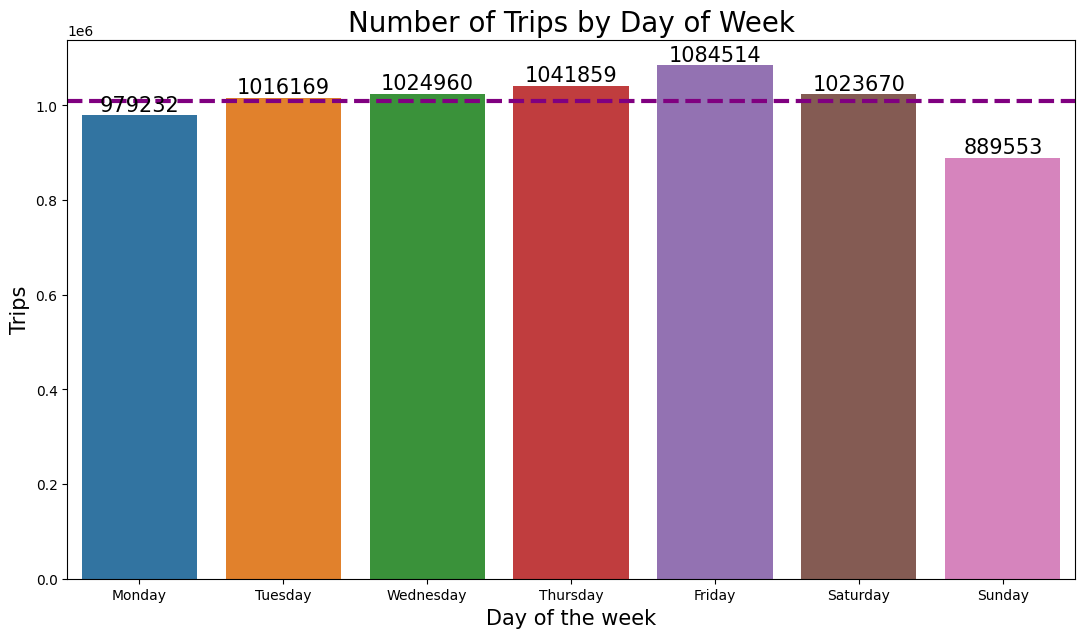

In [ ]:
# liczba wypożyczeń każdego dnia tygodnia
cities = df['City'].unique()

plt.figure(figsize = (13, 7))
plot = sns.countplot(x=df["Day of week"], order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Trips by Day of Week", size = 20);
plot.axhline(tdw["Trips"].mean(), linestyle="--", color="purple", label="Average = 831783", linewidth = 3)
plt.xlabel("Day of the week", size = 15);
plt.ylabel("Trips", size = 15);

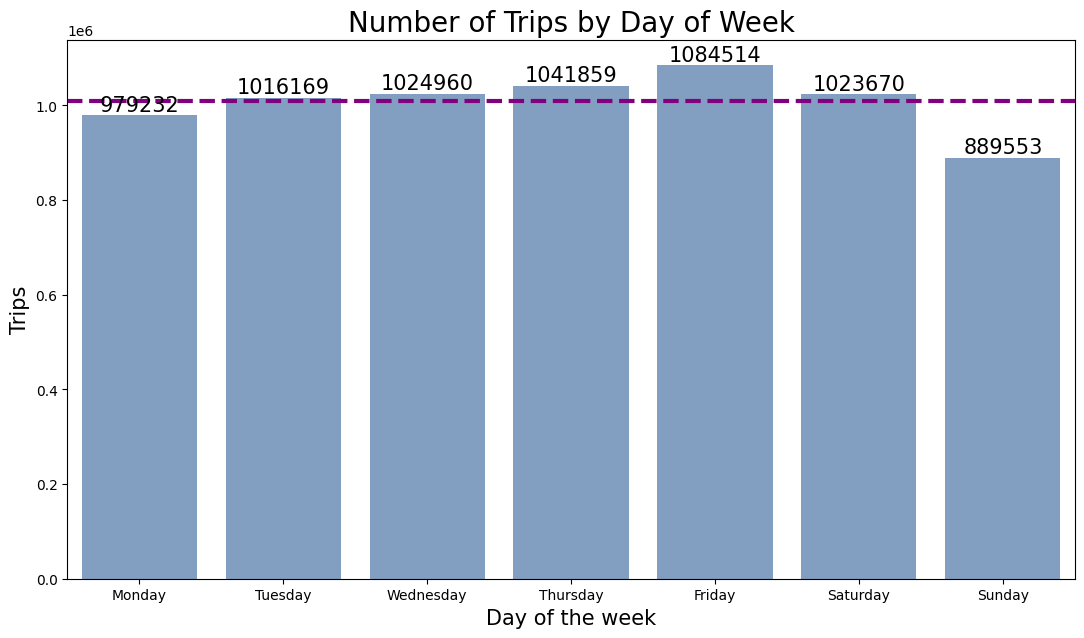

In [ ]:
cities = df['City'].unique()

plt.figure(figsize=(13, 7))
plot = sns.countplot(x=df["Day of week"], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='#779ECB')
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x()+0.4, p.get_height()),
                  ha='center', va='bottom', color='black', size=15)
plt.title("Number of Trips by Day of Week", size=20)
plot.axhline(tdw["Trips"].mean(), linestyle="--", color="purple", label="Average = 831783", linewidth=3)
plt.xlabel("Day of the week", size=15)
plt.ylabel("Trips", size=15)

plt.show()

### Number of Trips by Hour of the Day

In [ ]:
tdw = df.groupby("Hour")["Hour"].agg(["count"]).reset_index()
tdw.columns = ["Hour", "Trips"]
tdw["Trips"].mean()

294164.875

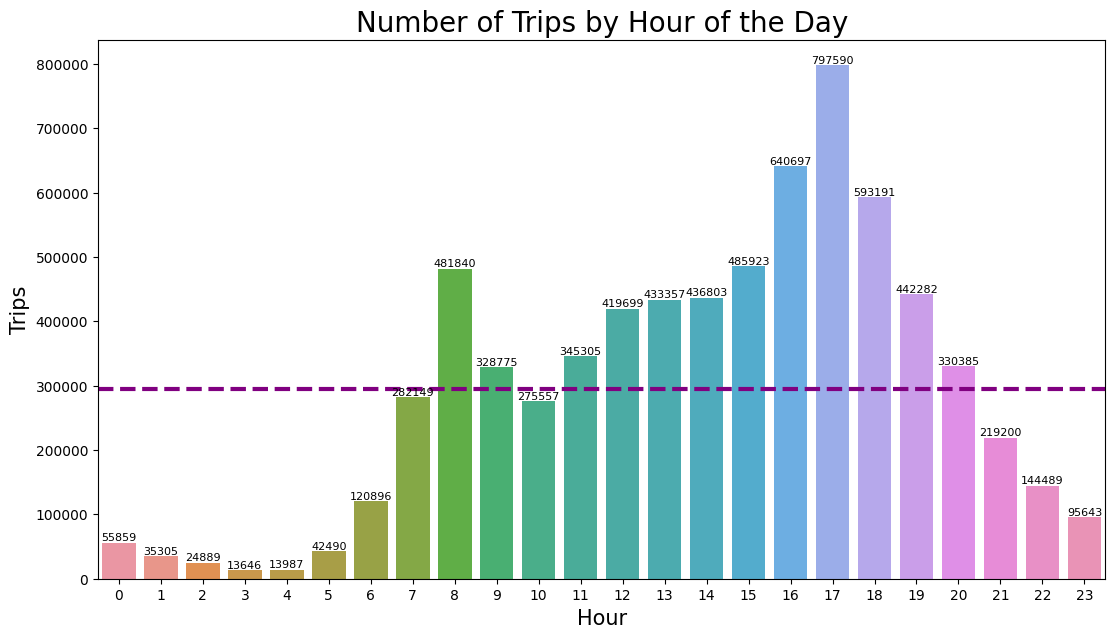

In [ ]:
# o której ludzie zwykle wypożyczają
plt.figure(figsize = (13, 7))
plot = sns.countplot(x=df['Hour']);
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 8)
plt.title("Number of Trips by Hour of the Day", size = 20);
plot.axhline(tdw["Trips"].mean(), linestyle="--", color="purple", label="Average = 242603", linewidth = 3)
plt.xlabel("Hour", size = 15);
plt.ylabel("Trips", size = 15);

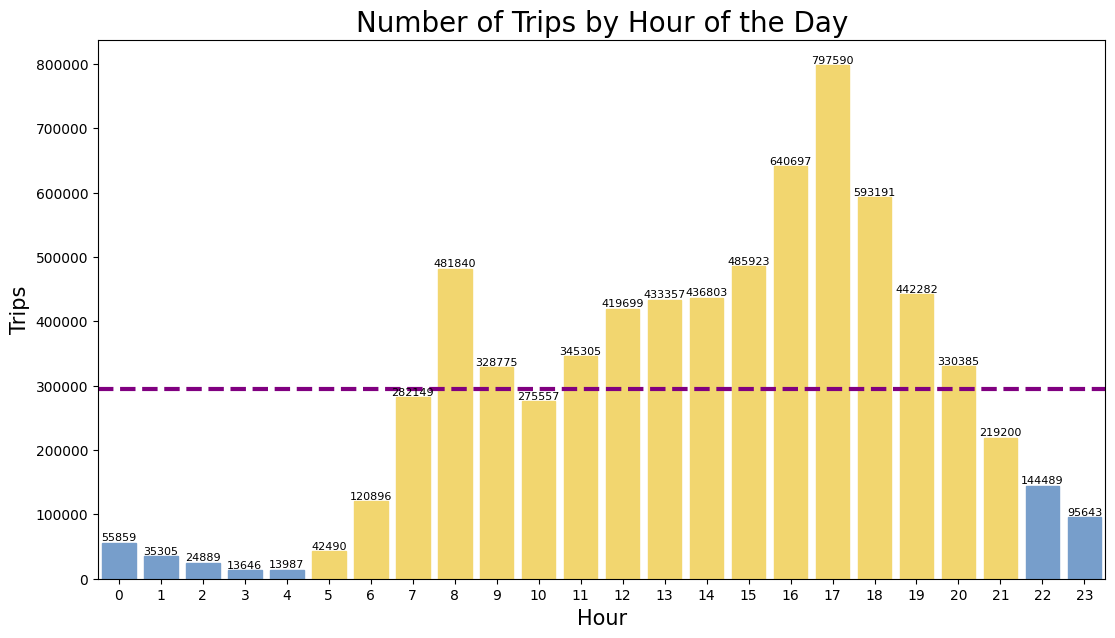

In [ ]:
# Grupowanie danych
tdw = df.groupby("Hour")["Hour"].agg(["count"]).reset_index()
tdw.columns = ["Hour", "Trips"]

# Średnia liczba wypożyczeń
average_trips = tdw["Trips"].mean()

# Tworzenie palety kolorów
colors = ["#779ECB", "#F2D66F"]  # Granatowy pastelowy, żółty pastelowy

# Tworzenie histogramu
plt.figure(figsize=(13, 7))
plot = sns.countplot(x=df['Hour'], palette=colors)

# Zmiana kolorów na granatowy pastelowy i żółty pastelowy
for p, hour in zip(plot.patches, tdw["Hour"]):
    if hour >= 22 or hour <= 4:
        p.set_color(colors[0])
    else:
        p.set_color(colors[1])

    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height()),
                  ha='center', va='bottom', color='black', size=8)

# Dodanie linii oznaczającej średnią liczbę wypożyczeń
plot.axhline(average_trips, linestyle="--", color="purple", label="Average = {:.0f}".format(average_trips), linewidth=3)

# Pozostałe ustawienia wykresu
plt.title("Number of Trips by Hour of the Day", size=20)
plt.xlabel("Hour", size=15)
plt.ylabel("Trips", size=15)

# Wyświetlenie wykresu
plt.show()

## Number of Trips by Month

In [ ]:
tdw = df.groupby("Month")["Month"].agg(["count"]).reset_index()
tdw.columns = ["Month", "Trips"]
tdw["Trips"].mean()

588329.75

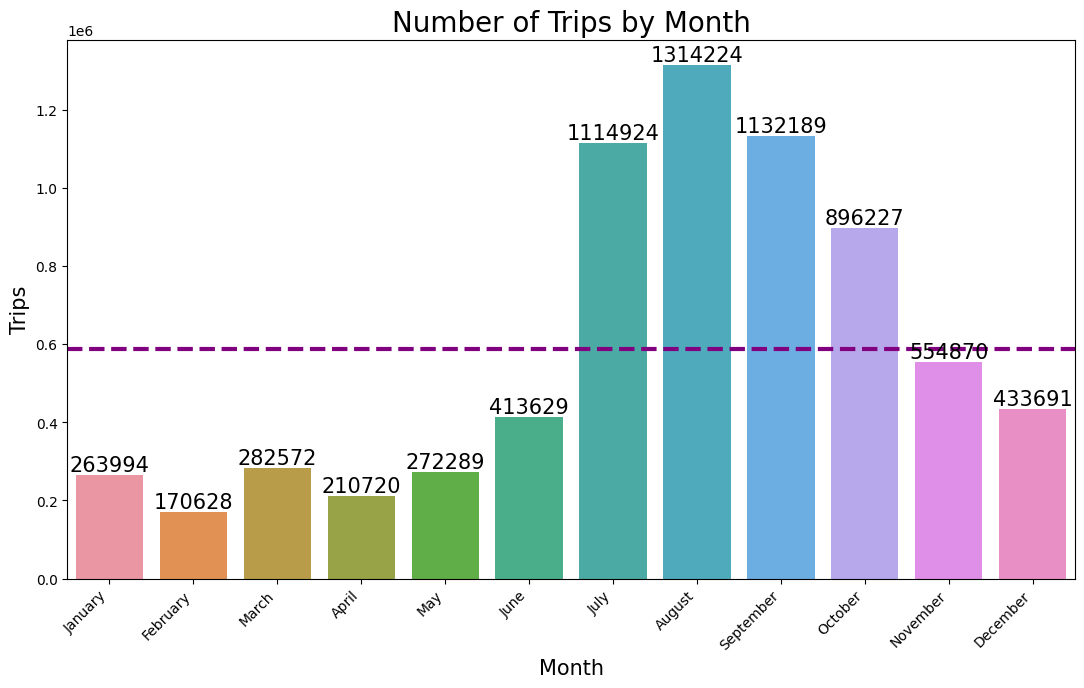

In [ ]:
plt.figure(figsize = (13, 7))
plot = sns.countplot(x=df["Month"], order = [1,2,3,4,5,6,7,8,9,10,11,12]);

month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.xticks(ticks=range(12), labels=month_labels, rotation=45, ha='right')

for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Trips by Month", size = 20);
plot.axhline(tdw["Trips"].mean(), linestyle="--", color="purple", label="Average = 485207", linewidth = 3)
plt.xlabel("Month", size = 15);
plt.ylabel("Trips", size = 15);

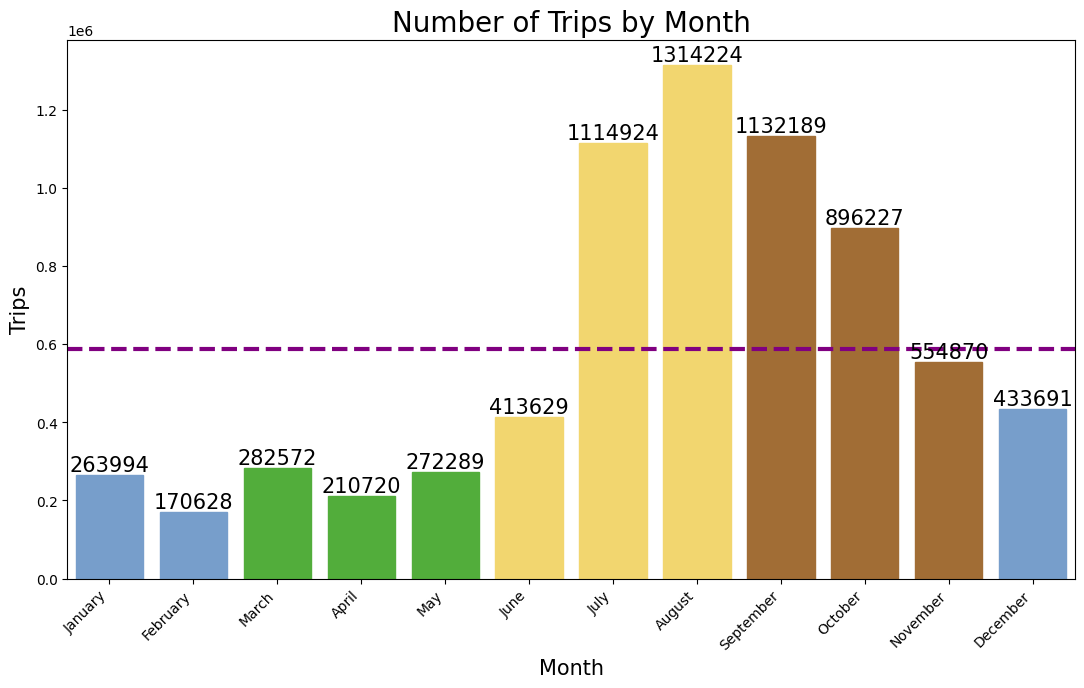

In [ ]:
# Grupowanie danych
tdw = df.groupby("Month")["Month"].agg(["count"]).reset_index()
tdw.columns = ["Month", "Trips"]

# Średnia liczba wypożyczeń
average_trips = tdw["Trips"].mean()

# Tworzenie palety kolorów
colors = ["#F2D66F", '#a16d35', "#779ECB", '#52ad3b']   # Żółty, brązowy, niebieski, zielony (pastelowe odcienie)

plt.figure(figsize=(13, 7))
plot = sns.countplot(x=df["Month"], order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], palette=colors)

month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=range(12), labels=month_labels, rotation=45, ha='right')

for p, month in zip(plot.patches, tdw["Month"]):
    if month in [6, 7, 8]:
        p.set_color(colors[0])  # Żółty - czerwiec, lipiec, sierpień (lato)
    elif month in [9, 10, 11]:
        p.set_color(colors[1])  # Brązowy - wrzesień, październik, listopad (jesień)
    elif month in [12, 1, 2]:
        p.set_color(colors[2])  # Niebieski - grudzień, styczeń, luty (zima)
    else:
        p.set_color(colors[3])  # Zielony - marzec, kwiecień, maj (wiosna)

    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                  ha='center', va='bottom', color='black', size=15)

plot.axhline(average_trips, linestyle="--", color="purple", label="Average = {:.0f}".format(average_trips), linewidth=3)

plt.title("Number of Trips by Month", size=20)
plt.xlabel("Month", size=15)
plt.ylabel("Trips", size=15)

plt.show()

### Number of Trips by Hour for each day of the Week

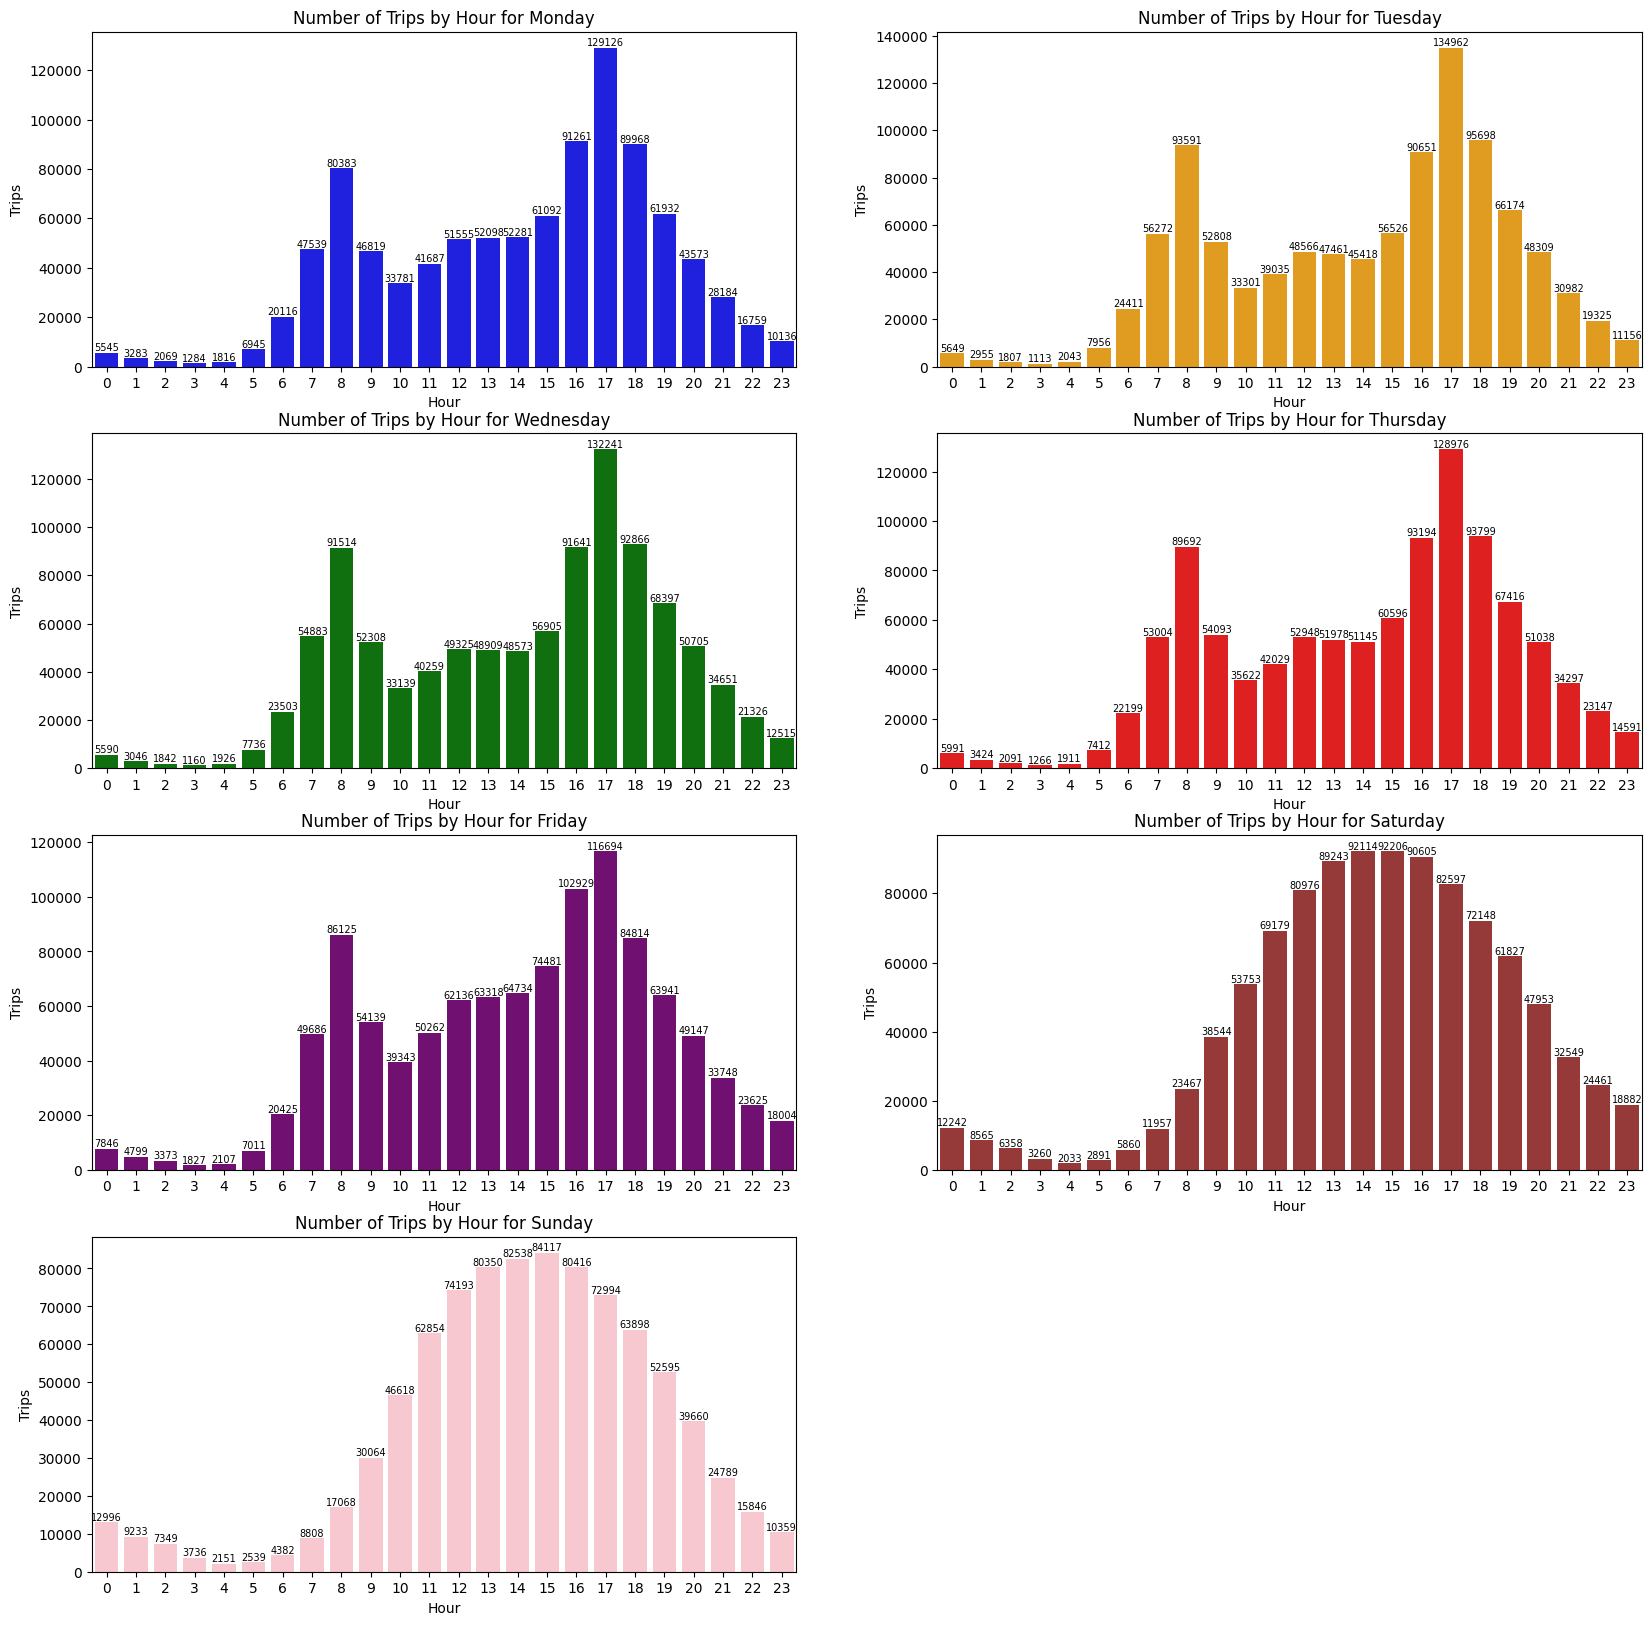

In [ ]:
plt.figure(figsize=(20, 20))
colors = {'Monday': 'blue', 'Tuesday': 'orange', 'Wednesday': 'green',
          'Thursday': 'red', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'pink'}

for i, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']):
    subset = df[df['Day of week'] == day]
    plt.subplot(4, 2, i+1)
    plot = sns.countplot(x=subset['Hour'], color=colors[day])
    plt.xlabel('Hour')
    plt.ylabel('Trips')
    plt.title('Number of Trips by Hour for ' + day)
    for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 7)
plt.show()

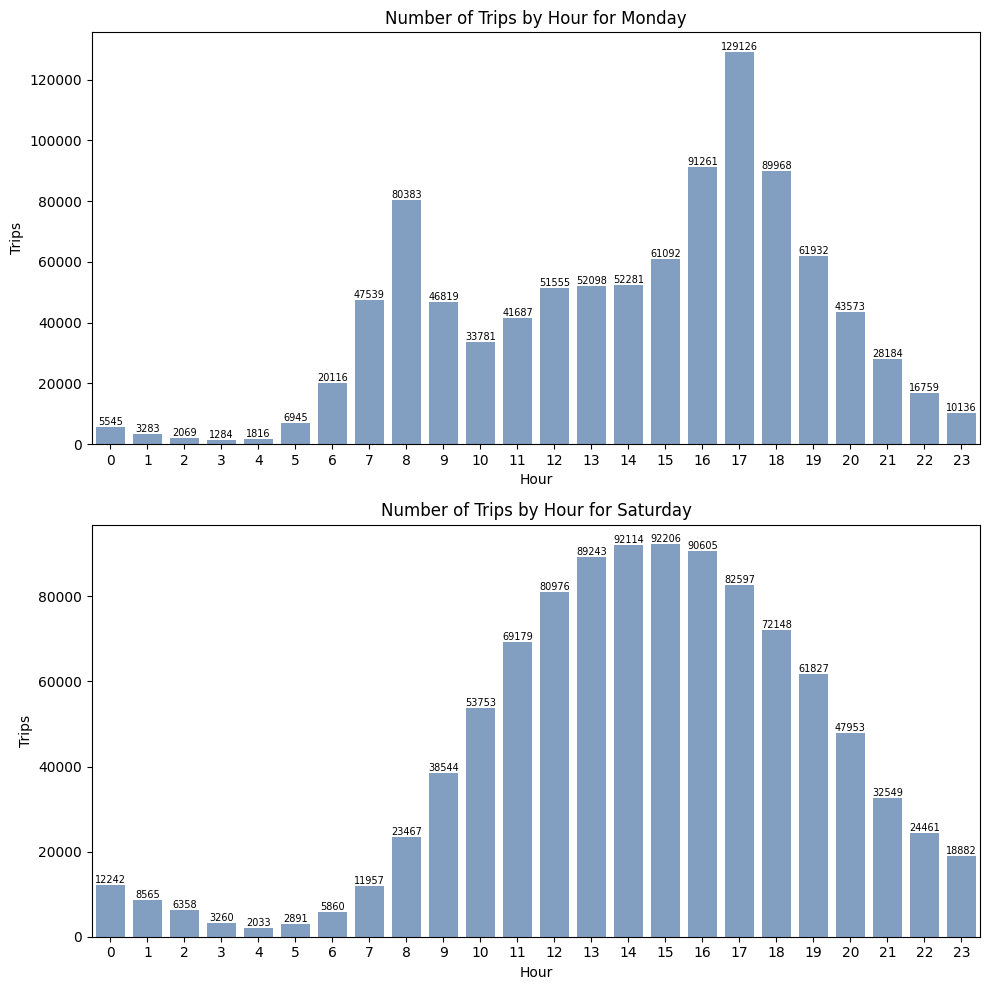

In [ ]:
plt.figure(figsize=(10, 10))

# Histogram dla poniedziałku
subset_monday = df[df['Day of week'] == 'Monday']
plt.subplot(2, 1, 1)
plot_monday = sns.countplot(x=subset_monday['Hour'], color='#779ECB')
plt.xlabel('Hour')
plt.ylabel('Trips')
plt.title('Number of Trips by Hour for Monday')
for p in plot_monday.patches:
    plot_monday.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x()+0.4, p.get_height()),
                   ha='center', va='bottom', color='black', size=7)

# Histogram dla soboty
subset_saturday = df[df['Day of week'] == 'Saturday']
plt.subplot(2, 1, 2)
plot_saturday = sns.countplot(x=subset_saturday['Hour'], color='#779ECB')
plt.xlabel('Hour')
plt.ylabel('Trips')
plt.title('Number of Trips by Hour for Saturday')
for p in plot_saturday.patches:
    plot_saturday.annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom', color='black', size=7)

plt.tight_layout()
plt.show()

In [ ]:
df['Start Date'] = df["Start Time"].dt.date
ntd = df.groupby(["Start Date", 'City'])["Start Time"].agg(["count"]).reset_index()
ntd.columns = ["Date", "City", "Trips"]
ntd.head()

,Date,City,Trips
0,2018-04-03,Austin,1
1,2018-04-04,Austin,2
2,2018-04-05,Austin,81
3,2018-04-06,Austin,256
4,2018-04-07,Austin,132


### Number of trips in time for each city

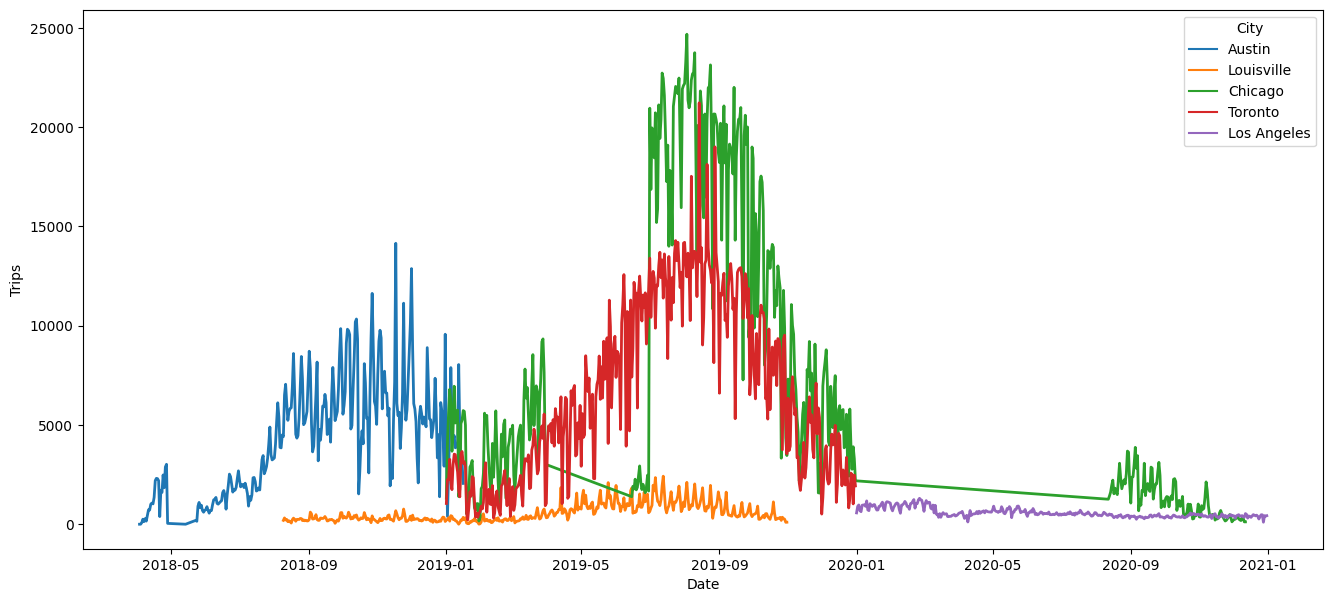

In [ ]:
# jak często wypożyczali dla poszczególnych miast razem
plt.figure(figsize = (16, 7));
plot = sns.lineplot(x = "Date", y = "Trips", data = ntd, hue = "City", linewidth = 2);

### Number of trips for each city by weekdays

<ipython-input-46-4d1a6ef4170c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_labels, rotation=45, ha='right')
<ipython-input-46-4d1a6ef4170c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_labels, rotation=45, ha='right')
<ipython-input-46-4d1a6ef4170c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_labels, rotation=45, ha='right')
<ipython-input-46-4d1a6ef4170c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_labels, rotation=45, ha='right')
<ipython-input-46-4d1a6ef4170c>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(day_labels, rotation=45, ha='right')


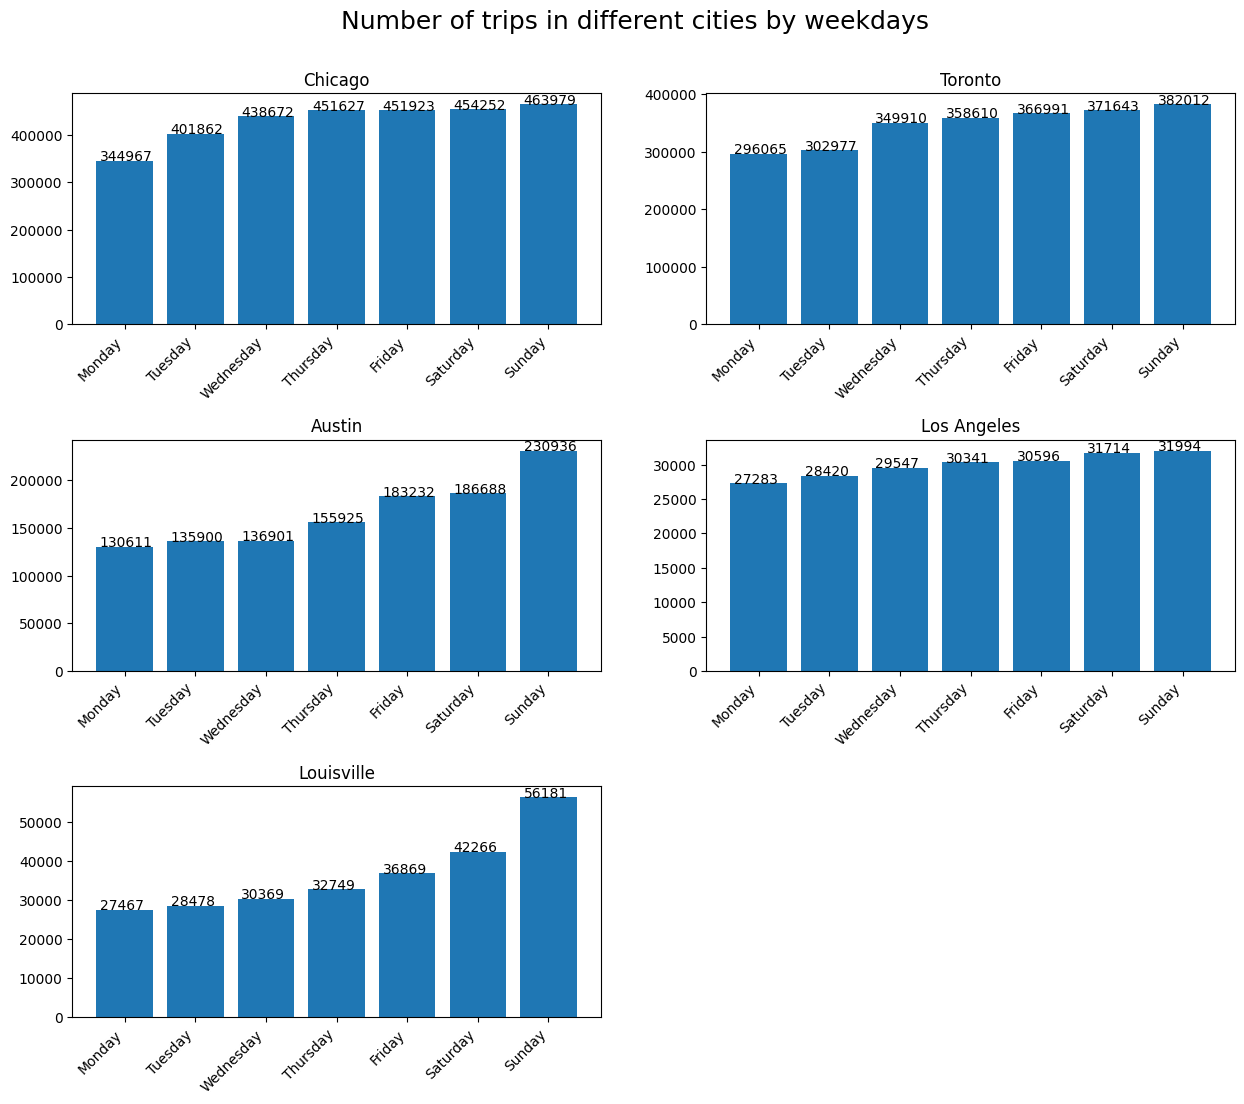

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Number of trips in different cities by weekdays", fontsize=18, y=0.95)

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for city, ax in zip(cities, axs.ravel()):
    df1 = df[df['City'] == city]
    counts = df1.groupby(by='Day of week').size().sort_values()
    ax.bar(counts.index, counts)

    ax.set_title(city)
    ax.set_xlabel("")
    for i, v in enumerate(counts):
        ax.text(i - 0.35, v, str(v), color='black')

    ax.set_xticklabels(day_labels, rotation=45, ha='right')

if len(cities) % 2 == 1:
    fig.delaxes(axs[-1, -1])

plt.show()

### Number of trips for each city by hour

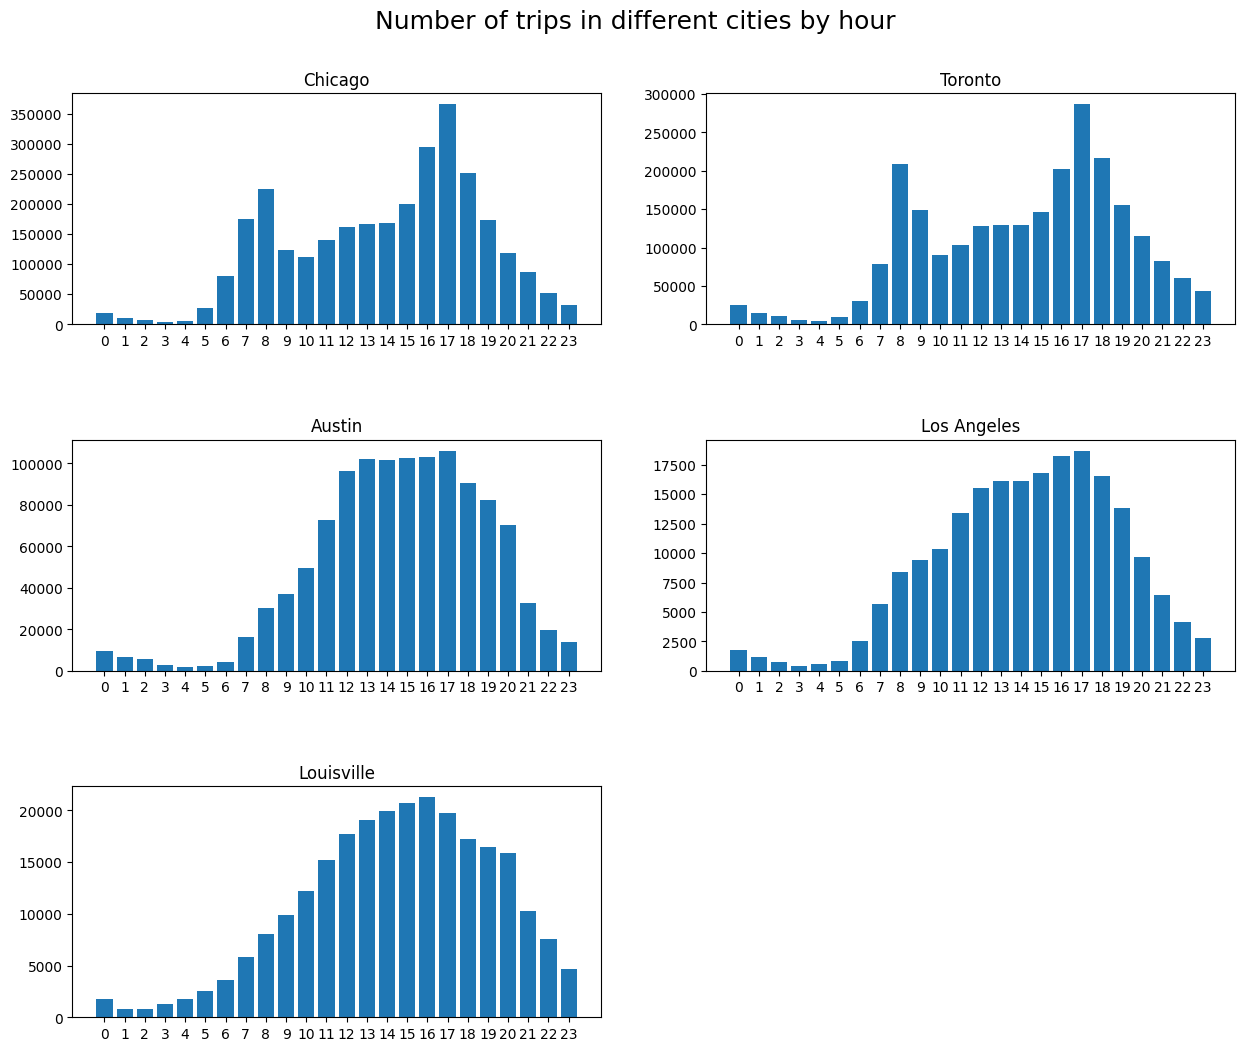

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Number of trips in different cities by hour", fontsize=18, y=0.95)

for city, ax in zip(cities, axs.ravel()):
    df1 = df[df['City'] == city]
    counts = df1.groupby(by='Hour').size().sort_values()
    ax.bar(counts.index, counts)

    ax.set_title(city)
    ax.set_xlabel("")
    ax.set_xticks(range(24))
    ax.set_xticklabels(range(0,24))

if len(cities) % 2 == 1:
    fig.delaxes(axs[-1, -1])

plt.show()

### Number of trips by months
Choosing only cities which dataset has information about all year.

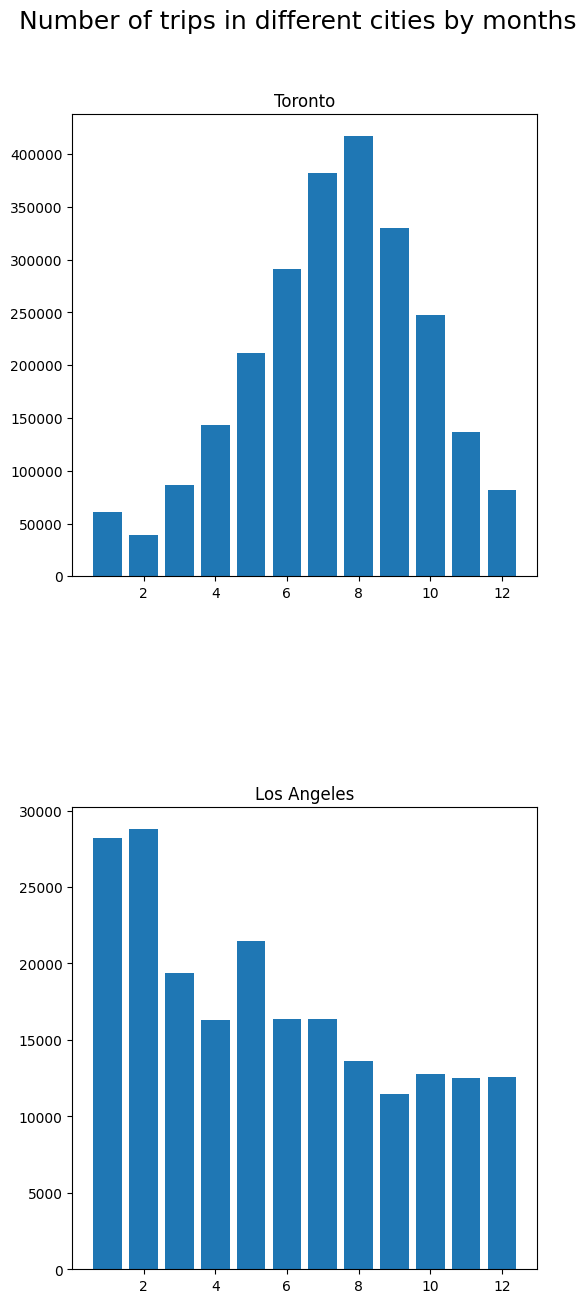

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 15))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Number of trips in different cities by months", fontsize=18, y=0.95)

cities = ['Toronto', 'Los Angeles']

for city, ax in zip(cities, axs.ravel()):
    df1 = df[df['City'] == city]
    counts = df1.groupby(by='Month').size().sort_values()
    ax.bar(counts.index, counts)

    ax.set_title(city)
    ax.set_xlabel("")

plt.show()

### Dla LA typy rowerów

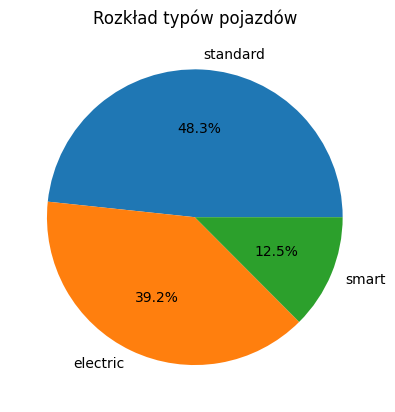

In [ ]:
grouped_data = df_los_angeles_2020['Vehicle Type'].value_counts()

plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
plt.title('Rozkład typów pojazdów')

plt.show()


### Places where was most often End Location for Chicago and Toronto

In [ ]:
import pandas as pd

cit_feat = ['End Location Name', 'City']

places = pd.concat([df_chicago[cit_feat], df_toronto_2019[cit_feat], df_los_angeles_2020[cit_feat]])

grouped = places.groupby('City')['End Location Name'].value_counts()

for city in places['City'].unique():
    city_data = grouped[city]

    top_5 = city_data.head(5)
    other = city_data.iloc[5:].sum()
    top_5['Inne'] = other

    print(f'Wyniki dla {city}:')
    print(top_5)
    print()


Wyniki dla Chicago:
End Location Name
Streeter Dr & Grand Ave           56871
WEST TOWN                         46711
Clinton St & Washington Blvd      36706
Canal St & Adams St               36389
NEAR WEST SIDE                    35049
Inne                            2772770
Name: End Location Name, dtype: int64

Wyniki dla Toronto:
End Location Name
York St / Queens Quay W                            30897
Union Station                                      25631
Bay St / Queens Quay W (Ferry Terminal)            24084
Bathurst St/Queens Quay(Billy Bishop Airport)      23139
Adelaide St W / Bay St - SMART                     19408
Inne                                             2304611
Name: End Location Name, dtype: int64

Wyniki dla Los Angeles:
End Location Name
7th & Flower                     8757
Figueroa & 8th                   7333
Metro Bike Share Free Bikes      4236
Virtual Station                  4230
Union Station West Portal        4106
Inne                           1

 ### Czas przejazdu w zalezności od daty dla kazdego miasta
 imo spoko tylko Chicago psuje, co jest dziwne bo zbió o rowerach ejst na cały rok a między marcem a lipcem w 2019 ma jakieś braki

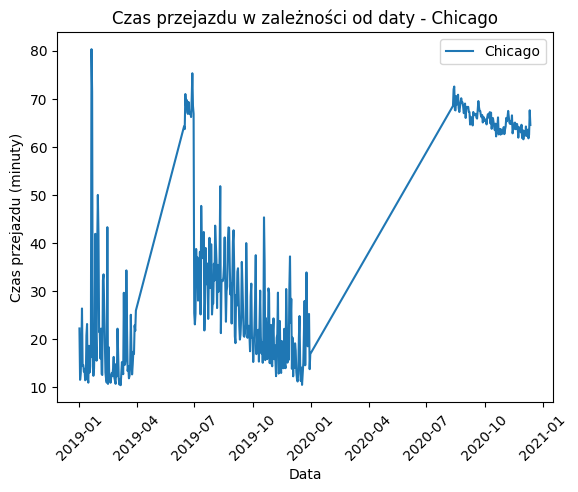

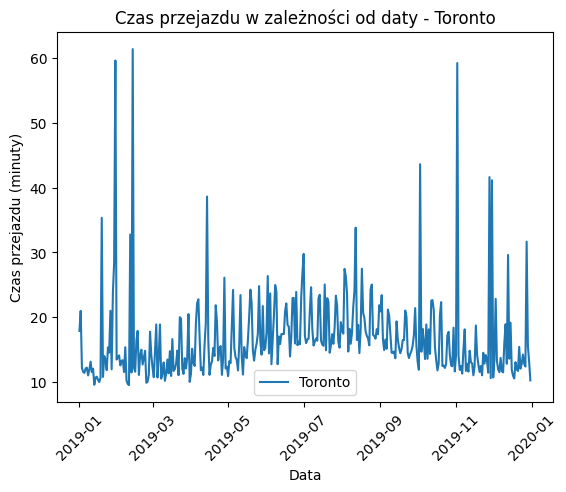

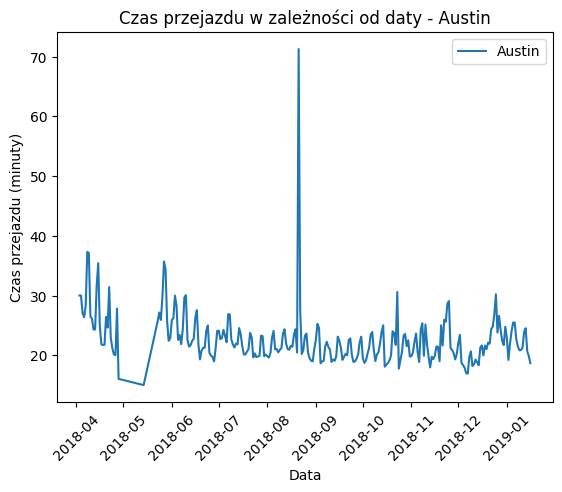

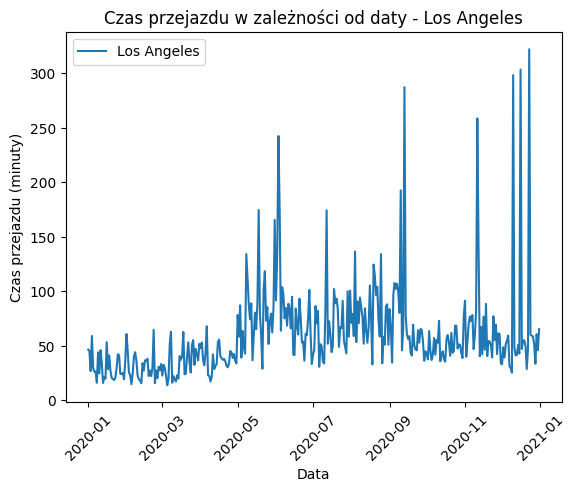

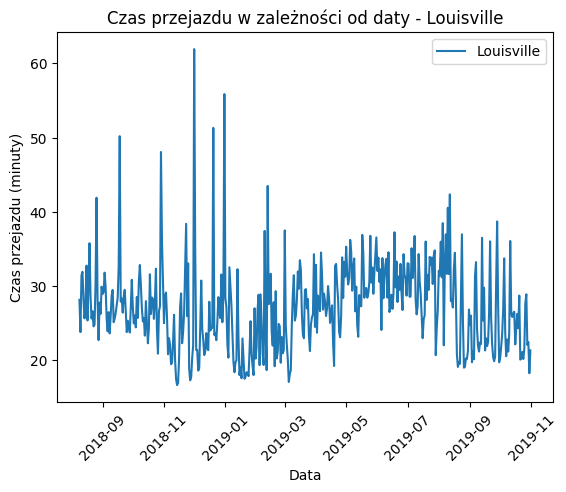

In [ ]:
for city in df['City'].unique():
    city_data = df[df['City'] == city]

    grouped_data = city_data.groupby(city_data['Start Time'].dt.date)['Trip Duration'].mean()

    plt.plot(grouped_data.index, grouped_data.values, label=city)

    plt.xlabel('Data')
    plt.ylabel('Czas przejazdu (minuty)')
    plt.title(f'Czas przejazdu w zależności od daty - {city}')
    plt.xticks(rotation=45)
    plt.legend()

    plt.show()

### Trip Duration by weekday for every city

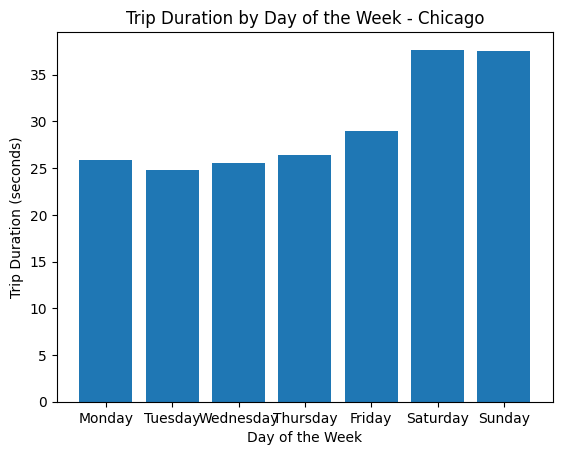

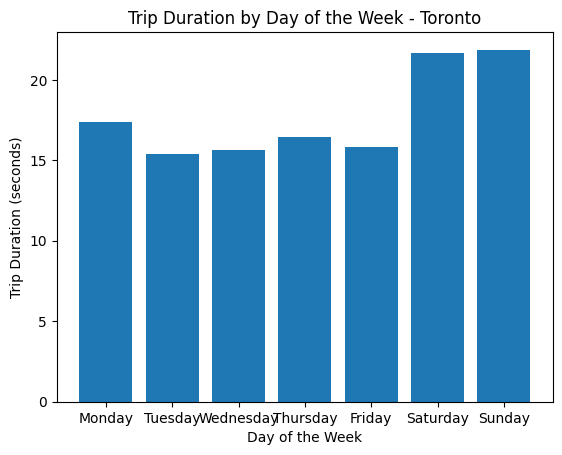

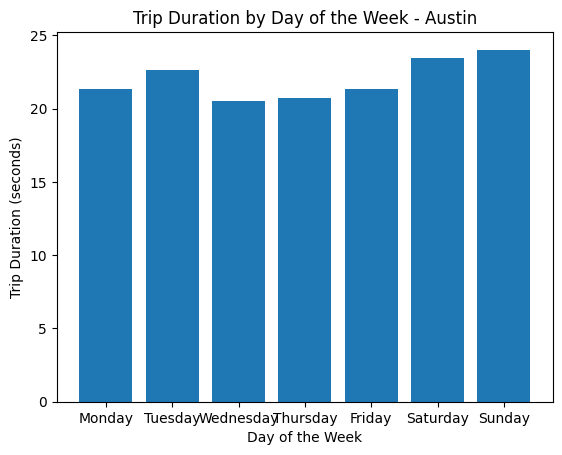

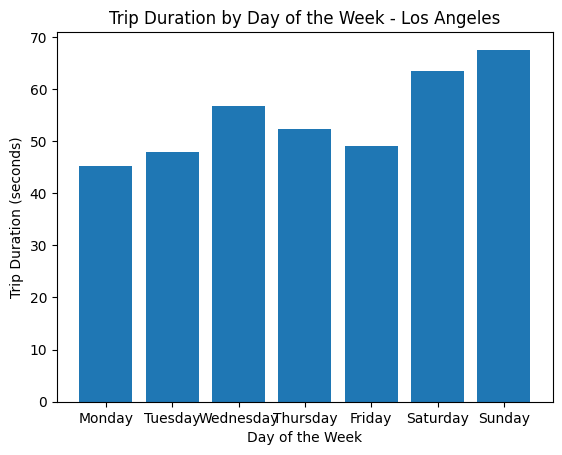

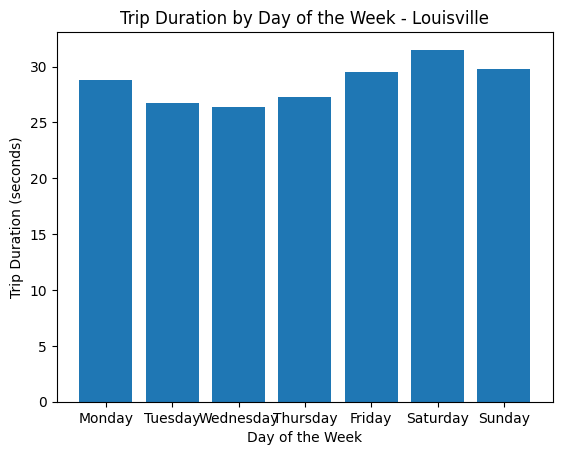

In [ ]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for city in df['City'].unique():
    city_data = df[df['City'] == city]

    grouped_data = city_data.groupby(city_data['Start Time'].dt.dayofweek)['Trip Duration'].mean()

    plt.bar(weekday_names, grouped_data.values)

    plt.xlabel('Day of the Week')
    plt.ylabel('Trip Duration (seconds)')
    plt.title(f'Trip Duration by Day of the Week - {city}')

    plt.show()


### Number of trips for genders of chicaco bicyckle dataset by hour

In [ ]:
df_female = df_chicago_2019_bic[df_chicago_2019_bic['Gender'] == 'Female']
df_male = df_chicago_2019_bic[df_chicago_2019_bic['Gender'] == 'Male']

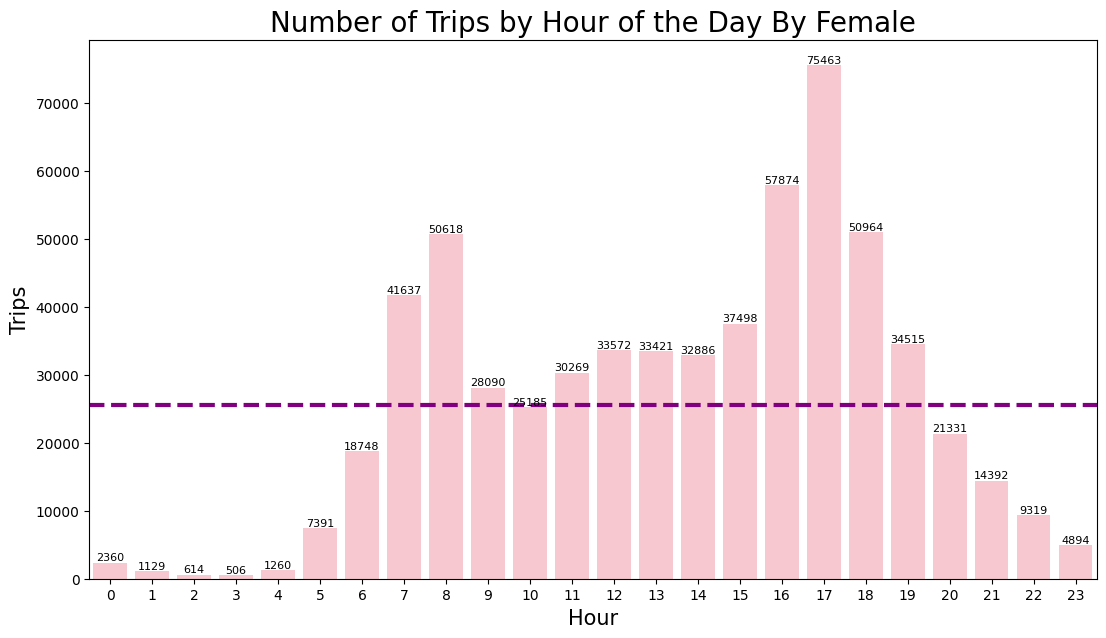

In [ ]:
tdw = df_female.groupby("Hour")["Hour"].agg(["count"]).reset_index()
tdw.columns = ["Hour", "Trips"]
tdw["Trips"].mean()

plt.figure(figsize = (13, 7));
plot = sns.countplot(x=df_female['Hour'], color='pink');
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 8)
plt.title("Number of Trips by Hour of the Day By Female", size = 20);
plot.axhline(tdw["Trips"].mean(), linestyle="--", color="purple", label="Average = 180336", linewidth = 3) ;
plt.xlabel("Hour", size = 15);
plt.ylabel("Trips", size = 15);
plt.show();

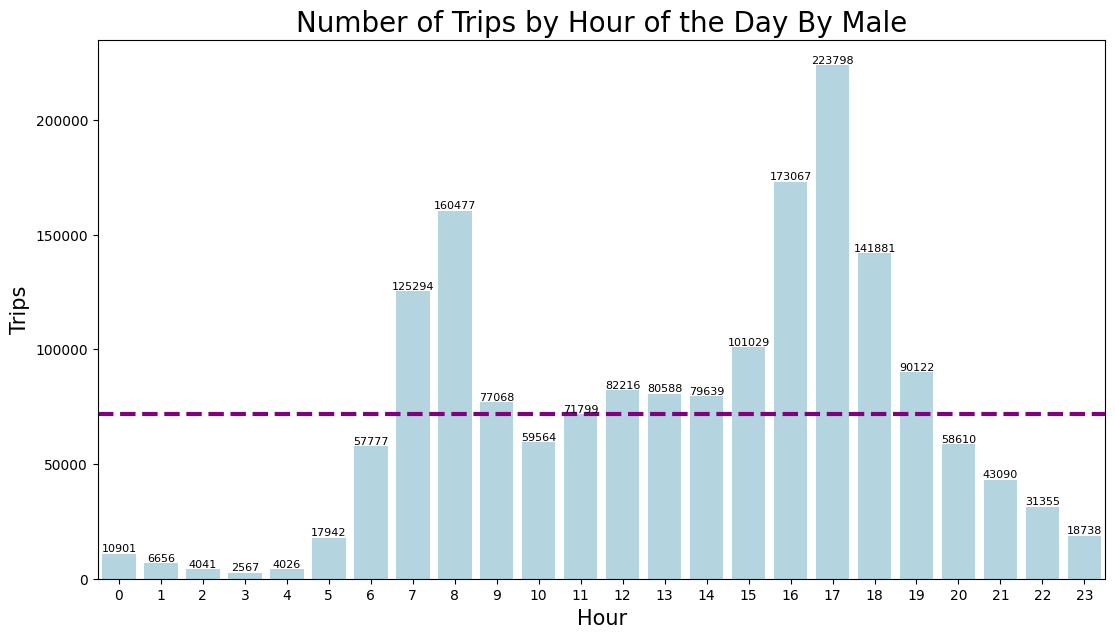

In [ ]:
tdw = df_male.groupby("Hour")["Hour"].agg(["count"]).reset_index()
tdw.columns = ["Hour", "Trips"]
tdw["Trips"].mean()

plt.figure(figsize = (13, 7));
plot = sns.countplot(x=df_male['Hour'], color='lightblue');  # Ustawienie koloru na niebieski
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 8)
plt.title("Number of Trips by Hour of the Day By Male", size = 20);
plot.axhline(tdw["Trips"].mean(), linestyle="--", color="purple", label="Average = 180336", linewidth = 3) ;
plt.xlabel("Hour", size = 15);
plt.ylabel("Trips", size = 15);
plt.show();

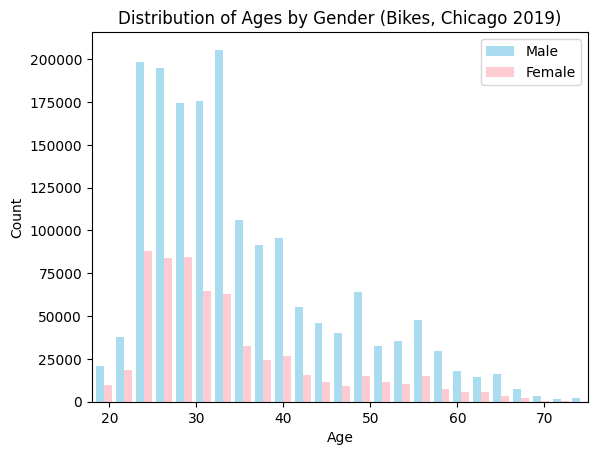

In [ ]:
df_chicago_2019_bic['age'] = 2019 - df_chicago_2019_bic['Birth Year']

male_data = df_chicago_2019_bic[df_chicago_2019_bic['Gender'] == 'Male']
female_data = df_chicago_2019_bic[df_chicago_2019_bic['Gender'] == 'Female']

plt.hist([male_data['age'], female_data['age']], bins=50, color=['skyblue', 'lightpink'], alpha=0.7, label=['Male', 'Female']);
plt.xlim(left=18, right=75);

plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Distribution of Ages by Gender (Bikes, Chicago 2019)');

plt.legend();
plt.show();

## E-scooter speed calculation
For Chicago in 2019:

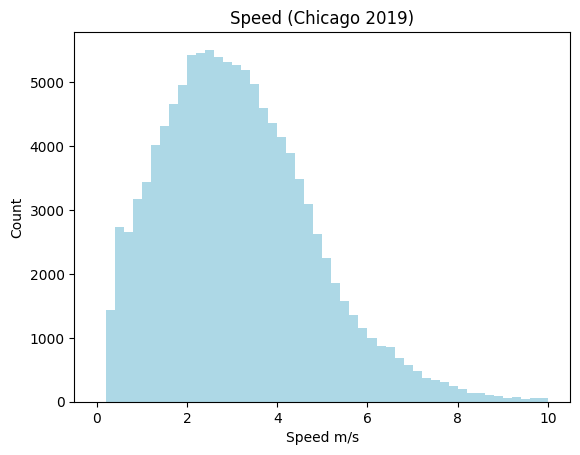

In [ ]:
df_chicago_2019c = pd.read_csv('e-scooter-trips-2019-pilot-1.csv')
df_chicago_2019c = df_chicago_2019c[df_chicago_2019c['Start Time'] != df_chicago_2019c['End Time']]

speed19 = df_chicago_2019c['Trip Distance']/df_chicago_2019c['Trip Duration']

speed19 = speed19.dropna()

speed19 = speed19[(speed19 >= 0.3)]
speed19 = speed19[(speed19 <= 10)]

plt.hist(speed19, bins=50, color='#ADD8E6', range=(0, 10))
plt.xlabel('Speed m/s')
plt.ylabel('Count')
plt.title('Speed (Chicago 2019)')

plt.show()

For Chicago in 2020:

<ipython-input-56-3e7faec6c716>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chicago_2020c['Trip Duration'] = df_chicago_2020c['Trip Duration'].str.replace(',', '.').astype(float)


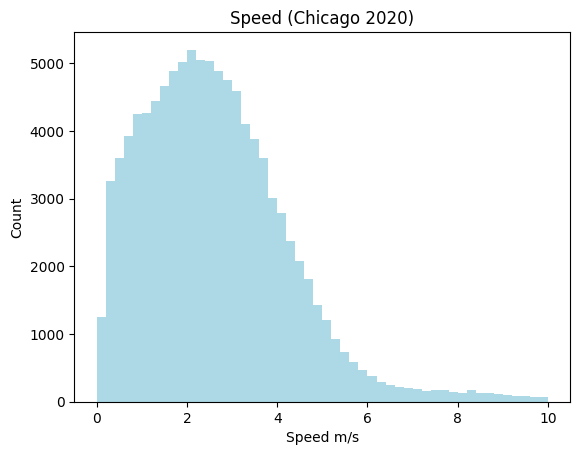

In [ ]:
df_chicago_2020c = pd.read_csv('E-Scooter_Trips_-_2020.csv',  on_bad_lines='skip')
df_chicago_2020c = df_chicago_2020c[df_chicago_2020c['Start Time'] != df_chicago_2020c['End Time']]

df_chicago_2020c['Trip Duration'] = df_chicago_2020c['Trip Duration'].str.replace(',', '.').astype(float)
df_chicago_2020c['Trip Distance'] = df_chicago_2020c['Trip Distance'].str.replace(',', '.').astype(float)

speed20 = df_chicago_2020c['Trip Distance']/df_chicago_2020c['Trip Duration']

speed20 = speed20.dropna()

speed20 = speed20[(speed20 >= 0.1)]
speed20 = speed20[(speed20 <= 10)]

plt.hist(speed20, bins=50, color='#ADD8E6', range=(0, 10))

plt.xlabel('Speed m/s')
plt.ylabel('Count')
plt.title('Speed (Chicago 2020)')

plt.show()

For Austin in 2018:

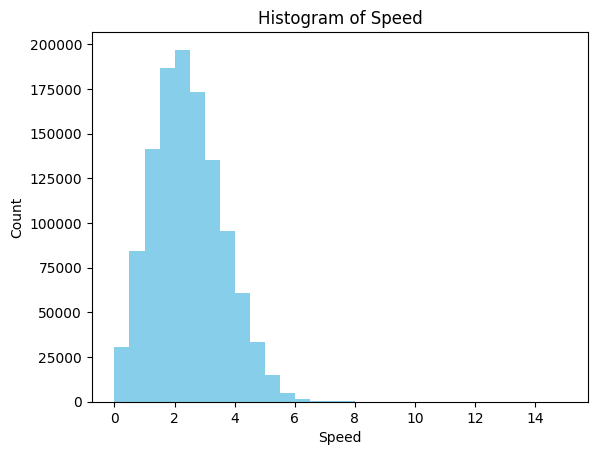

2     2.572254
6     2.862860
8     1.574906
9     0.917051
11    1.932182
dtype: float64

In [ ]:
df_austin_2018c = pd.read_csv('clean_austin_dockless_mobility.csv')
df_austin_2018c = df_austin_2018c[df_austin_2018c['start_time'] != df_austin_2018c['end_time']]

speed_a_2018 = df_austin_2018c['trip_distance']/df_austin_2018c['trip_duration']

speed_a_2018 = speed_a_2018.dropna()
speed_a_2018 = speed_a_2018[(speed_a_2018 <= 10)]

plt.hist(speed_a_2018, bins=30, color='skyblue', range=(0, 15))

plt.xlabel('Speed')
plt.ylabel('Count')
plt.title('Histogram of Speed')
plt.show()
speed_a_2018.head()

In [ ]:
mean_c_2019 = np.mean(speed19)
mean_c_2020 = np.mean(speed20)
mean_a_2018 = np.mean(speed_a_2018)

print("Średnia Chicago 2019: ", mean_c_2019, " m/s")
print("Średnia Chicago 2020: ", mean_c_2020, " m/s")
print("Średnia Austin 2018: ", mean_a_2018, " m/s")

std_c_2019 = np.std(speed19)
std_c_2020 = np.std(speed20)
std_a_2018 = np.std(speed_a_2018)

print("Odchylenie standardowe: ", std_c_2019, " m/s")
print("Odchylenie standardowe: ", std_c_2020, " m/s")
print("Odchylenie standardowe: ", std_a_2018, " m/s")

Średnia Chicago 2019:  3.132123673727902  m/s
Średnia Chicago 2020:  2.6205937222307685  m/s
Średnia Austin 2018:  2.4395566593866906  m/s
Odchylenie standardowe:  1.663498958675725  m/s
Odchylenie standardowe:  1.615124999115839  m/s
Odchylenie standardowe:  1.1480884220837202  m/s


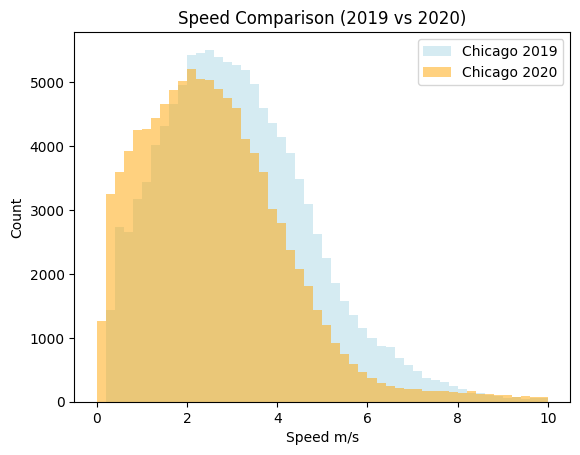

In [ ]:
plt.hist(speed19, bins=50, color='#ADD8E6', range=(0, 10), alpha=0.5, label='Chicago 2019')

plt.hist(speed20, bins=50, color='#FFA500', range=(0, 10), alpha=0.5, label='Chicago 2020')

plt.xlabel('Speed m/s')
plt.ylabel('Count')
plt.title('Speed Comparison (2019 vs 2020)')

plt.legend()

plt.show()

##Maps

### Install and import needed packages

In [ ]:
pip install geopandas descartes folium matplotlib mapclassify rioxarray earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 38.3 MB/s eta 0:00:00


In [ ]:
import os
import folium
from folium import plugins
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import plotly.graph_objects as go
import random

data = et.data.get_data('colorado-flood')

os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Extracted output to /root/earth-analytics/data/colorado-flood/.


### Create and preprocess chicago dataset

In [ ]:
chicago_features2 = ['Start Time', 'End Time',
                     'Start Community Area Number', 'End Community Area Number',
                     'Start Location Name', 'End Location Name', 'Vehicle Type',
                     'Trip Duration', 'City', 'Day of week', 'Hour', 'Month', 'Distance',
                     "Start Latitude", "Start Longitude", "End Latitude", "End Longitude"]

df_chicago2 = pd.concat([df_chicago_2019[chicago_features2],df_chicago_2020[chicago_features2]])

bike_station_locations = df_chicago2[df_chicago2['Distance'] != 0].copy()
bike_station_locations = bike_station_locations[["Hour", "Start Latitude", "Start Longitude", "End Latitude", "End Longitude"]]
bike_station_locations = bike_station_locations.dropna(how="any")

In [ ]:
# mapa tylko dla tras dla godziny 8
fig = go.Figure()

bike_station_locations_hour_8 = bike_station_locations[bike_station_locations['Hour'] == 8].copy()


for index, info in bike_station_locations_hour_8[:200].iterrows():
    fig.add_trace(go.Scattermapbox(
            lon = [info["Start Longitude"], info["End Longitude"]],
            lat = [info["Start Latitude"], info["End Latitude"]],
            mode ="markers+lines",
            marker = dict(
                size = 8,
                color = 'black',
                sizemode = 'area')))

    l = 0.005  # the arrow length
    widh =0.06  #2*widh is the width of the arrow base as triangle

    A = np.array([info["Start Longitude"], info["Start Latitude"]])
    B = np.array([info["End Longitude"], info["End Latitude"]])
    v = B-A
    w = v/np.linalg.norm(v)
    u  =np.array([-v[1], v[0]])  #u orthogonal on  w

    P = B-l*w
    S = P - widh*u
    T = P + widh*u

    fig.add_trace(go.Scattermapbox(lon = [S[0], T[0], B[0], S[0]],
                                lat =[S[1], T[1], B[1], S[1]],
                                mode='lines',
                                fill='toself',
                                fillcolor='black',
                                line_color='black',
                                showlegend=False))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': -87.7, 'lat': 41.9},
        'style': "stamen-terrain",
        'zoom': 10})

fig.show()

In [ ]:
# mapa tylko dla tras dla godziny 17
fig = go.Figure()

bike_station_locations_hour_17 = bike_station_locations[bike_station_locations['Hour'] == 17].copy()


for index, info in bike_station_locations_hour_17[:200].iterrows():
    fig.add_trace(go.Scattermapbox(
            lon = [info["Start Longitude"], info["End Longitude"]],
            lat = [info["Start Latitude"], info["End Latitude"]],
            mode ="markers+lines",
            marker = dict(
                size = 8,
                color = 'black',
                sizemode = 'area')))

    l = 0.005  # the arrow length
    widh =0.06  #2*widh is the width of the arrow base as triangle

    A = np.array([info["Start Longitude"], info["Start Latitude"]])
    B = np.array([info["End Longitude"], info["End Latitude"]])
    v = B-A
    w = v/np.linalg.norm(v)
    u  =np.array([-v[1], v[0]])  #u orthogonal on  w

    P = B-l*w
    S = P - widh*u
    T = P + widh*u

    fig.add_trace(go.Scattermapbox(lon = [S[0], T[0], B[0], S[0]],
                                lat =[S[1], T[1], B[1], S[1]],
                                mode='lines',
                                fill='toself',
                                fillcolor='black',
                                line_color='black',
                                showlegend=False))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': -87.7, 'lat': 41.9},
        'style': "stamen-terrain",
        'zoom': 10})

fig.show()

### Preparation for Los Angeles dataset

In [ ]:
bike_station_locations2 = df_los_angeles_2020[df_los_angeles_2020['Distance'] != 0].copy()
bike_station_locations2 = bike_station_locations2[["Hour", "Start Latitude", "Start Longitude", "End Latitude", "End Longitude"]]
bike_station_locations2 = bike_station_locations2.dropna(how="any")

In [ ]:
# mapa tylko dla tras dla godziny 8
fig = go.Figure()

bike_station_locations_hour_82 = bike_station_locations2[bike_station_locations2['Hour'] == 8].copy()


for index, info in bike_station_locations_hour_82[:100].iterrows():
    fig.add_trace(go.Scattermapbox(
            lon = [info["Start Longitude"], info["End Longitude"]],
            lat = [info["Start Latitude"], info["End Latitude"]],
            mode ="markers+lines",
            marker = dict(
                size = 8,
                color = 'black',
                sizemode = 'area')))

    l = 0.005  # the arrow length
    widh =0.06  #2*widh is the width of the arrow base as triangle

    A = np.array([info["Start Longitude"], info["Start Latitude"]])
    B = np.array([info["End Longitude"], info["End Latitude"]])
    v = B-A
    w = v/np.linalg.norm(v)
    u  =np.array([-v[1], v[0]])  #u orthogonal on  w

    P = B-l*w
    S = P - widh*u
    T = P + widh*u

    fig.add_trace(go.Scattermapbox(lon = [S[0], T[0], B[0], S[0]],
                                lat =[S[1], T[1], B[1], S[1]],
                                mode='lines',
                                fill='toself',
                                fillcolor='black',
                                line_color='black',
                                showlegend=False))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': -118.25, 'lat': 34.04},
        'style': "stamen-terrain",
        'zoom': 11})

fig.show()

In [ ]:
# mapa tylko dla tras dla godziny 17
fig = go.Figure()

bike_station_locations_hour_172 = bike_station_locations2[bike_station_locations2['Hour'] == 17].copy()


for index, info in bike_station_locations_hour_172[:100].iterrows():
    fig.add_trace(go.Scattermapbox(
            lon = [info["Start Longitude"], info["End Longitude"]],
            lat = [info["Start Latitude"], info["End Latitude"]],
            mode ="markers+lines",
            marker = dict(
                size = 8,
                color = 'black',
                sizemode = 'area')))

    l = 0.005  # the arrow length
    widh =0.06  #2*widh is the width of the arrow base as triangle

    A = np.array([info["Start Longitude"], info["Start Latitude"]])
    B = np.array([info["End Longitude"], info["End Latitude"]])
    v = B-A
    w = v/np.linalg.norm(v)
    u  =np.array([-v[1], v[0]])  #u orthogonal on  w

    P = B-l*w
    S = P - widh*u
    T = P + widh*u

    fig.add_trace(go.Scattermapbox(lon = [S[0], T[0], B[0], S[0]],
                                lat =[S[1], T[1], B[1], S[1]],
                                mode='lines',
                                fill='toself',
                                fillcolor='black',
                                line_color='black',
                                showlegend=False))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': -118.25, 'lat': 34.04},
        'style': "stamen-terrain",
        'zoom': 11})

fig.show()

## Prediction Model
### Load libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

### Copy dataset of chicago 2019

In [ ]:
chicago2019 = df_chicago_2019.copy()

### Delete needless rows
When Distance is equal to 0.

In [ ]:
chicago2019 = chicago2019[chicago2019['Distance'] != 0]

Where Trip Distance is shorter than Distance, which should be bigger or equal.

In [ ]:
chicago2019 = chicago2019[chicago2019['Distance'].notna() & (chicago2019['Trip Distance'] <= chicago2019['Distance'])]

In [ ]:
chicago2019_sel_for_corr = chicago2019[['Start Community Area Number', 'Start Latitude', 'Start Longitude', 'Day of week', 'Hour', 'Trip Distance', 'Trip Duration', 'End Community Area Number']]

<ipython-input-73-b39ee79d2ef8>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



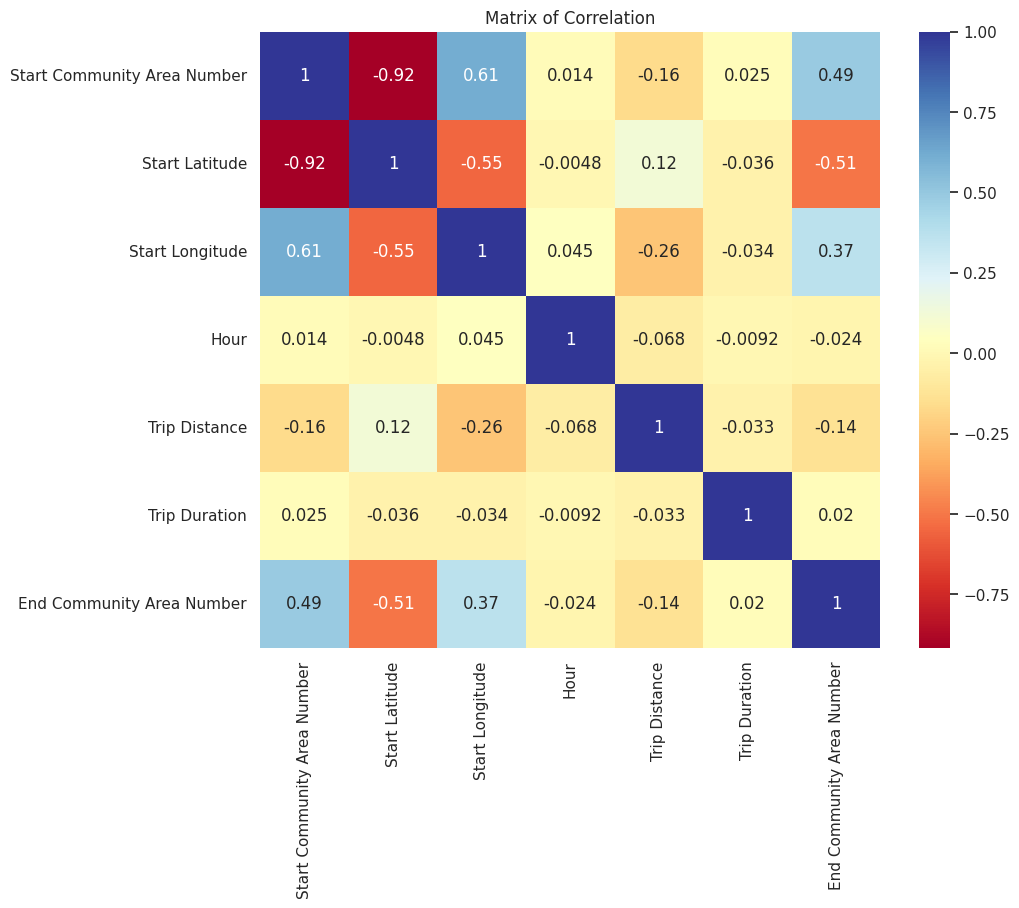

In [ ]:
correlation_matrix = chicago2019_sel_for_corr.corr()

sns.set(style="white")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")

plt.title("Matrix of Correlation")

plt.show()

### Prediction for Trip Duration of trip

In [ ]:
selected_features = ['Trip Distance', 'Start Community Area Number', 'End Community Area Number',
                     'Start Latitude', 'Start Longitude', 'End Latitude', 'End Longitude']

X = chicago2019[selected_features]
y = chicago2019['Trip Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = knn.score(X_test, y_test)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)


Mean Squared Error: 675.5060869565217
R-squared: -0.13491132679506102


Dla chicago o godzinie 8:

In [ ]:
chicago20198AM = chicago2019[chicago2019['Hour'] == 8]

In [ ]:
weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

chicago20198AM['Day of week'] = chicago20198AM['Day of week'].replace(weekday_mapping)

<ipython-input-76-366d66a74052>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
selected_features = ['Trip Distance', 'Start Community Area Number', 'Day of week', 'Hour']

X = chicago20198AM[selected_features]
y = chicago20198AM['Trip Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = dt_regressor.score(X_test, y_test)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

Mean Squared Error: 1658.8235294117646
R-squared: -1.7054176072234761


In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = knn.score(X_test, y_test)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

Mean Squared Error: 570.3529411764706
R-squared: 0.06979683972911965


Dla całego chicago:

In [ ]:
chicago2019['Day of week'] = chicago2019['Day of week'].replace(weekday_mapping)

In [ ]:
X = chicago2019[selected_features]
y = chicago2019['Trip Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = dt_regressor.score(X_test, y_test)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

Mean Squared Error: 1621.8260869565217
R-squared: -1.7248145230956862


In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = knn.score(X_test, y_test)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)

Mean Squared Error: 705.3495652173913
R-squared: -0.18505106966817442


### Prediction of End Location

In [ ]:
chicago2019.columns

Index(['Start Time', 'End Time', 'Trip Distance',
       'Start Community Area Number', 'End Community Area Number',
       'Start Location Name', 'End Location Name', 'Start Latitude',
       'Start Longitude', 'End Latitude', 'End Longitude', 'Vehicle Type',
       'Trip Duration', 'City', 'Day of week', 'Hour', 'Month', 'Distance'],
      dtype='object')

In [ ]:
features = ['Start Community Area Number', 'Start Latitude', 'Start Longitude', 'Day of week', 'Hour', 'Trip Distance', 'Trip Duration']
target = ['End Community Area Number']

X_train, X_test, Y_train, Y_test = train_test_split(chicago2019[features], chicago2019[target], test_size=0.20)

# Standaryzacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

random_forest = RandomForestClassifier()
random_forest = random_forest.fit(X_train_scaled, Y_train)

predictions = random_forest.predict(X_test_scaled)
print(classification_report(Y_test, predictions))

<ipython-input-83-cde7483dfb45>:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

         5.0       0.12      0.08      0.10        13
         6.0       0.00      0.00      0.00         1
         7.0       0.26      0.16      0.19        45
         8.0       0.13      0.07      0.09        28
        11.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.38      0.37      0.37        93
        16.0       0.45      0.36      0.40        81
        17.0       0.27      0.21      0.24        28
        18.0       0.21      0.20      0.21        20
        19.0       0.49      0.58      0.53       177
        20.0       0.41      0.24      0.30        88
        21.0       0.40      0.36      0.38       153
        22.0       0.55      0.66      0.60       549
        23.0       0.38      0.36      0.37       191
        24.0       0.65      0.72      0.68       891
        25.0       0.37      0.31      0.34       103
        26.0       0.26    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

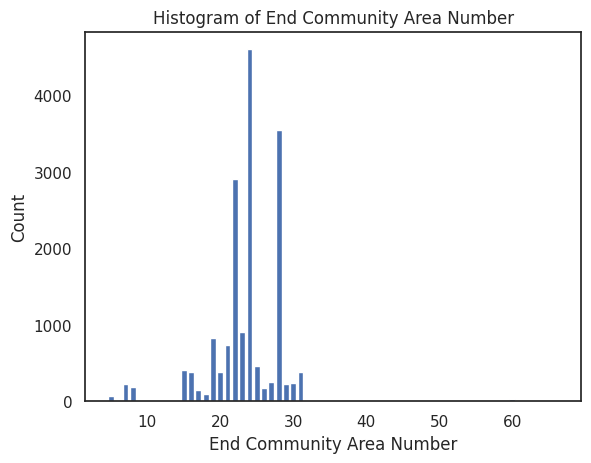

In [ ]:
# Grupowanie danych według kolumny 'End Community Area Number' i zliczenie wystąpień
counts = chicago2019['End Community Area Number'].value_counts()

plt.bar(counts.index, counts.values)

plt.xlabel('End Community Area Number')
plt.ylabel('Count')
plt.title('Histogram of End Community Area Number')

plt.show()

Dla supportu > 300

In [ ]:
# Filter data based on support for 'End Community Area Number'
filtered_data = chicago2019.groupby('End Community Area Number').filter(lambda x: len(x) > 300)

X_train, X_test, Y_train, Y_test = train_test_split(filtered_data[features], filtered_data[target], test_size=0.20)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

random_forest = RandomForestClassifier()
random_forest = random_forest.fit(X_train_scaled, Y_train)

predictions = random_forest.predict(X_test_scaled)
print(classification_report(Y_test, predictions))

<ipython-input-85-d7439398756c>:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



              precision    recall  f1-score   support

        15.0       0.52      0.40      0.45        93
        16.0       0.37      0.33      0.35        79
        19.0       0.52      0.56      0.54       152
        20.0       0.43      0.24      0.31        78
        21.0       0.48      0.39      0.43       152
        22.0       0.64      0.69      0.67       592
        23.0       0.39      0.34      0.36       166
        24.0       0.72      0.76      0.74       957
        25.0       0.36      0.42      0.38        72
        28.0       0.76      0.79      0.77       685
        31.0       0.64      0.39      0.49        89

    accuracy                           0.65      3115
   macro avg       0.53      0.48      0.50      3115
weighted avg       0.64      0.65      0.64      3115

